<a href="https://colab.research.google.com/github/HeyVijay5/HeyVijay5-TERRASLIDE---MONITORING-TERRAIN-SHIFTS-USING-DEEP-LEARNING/blob/main/SDP2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow

In [ ]:
!pip install matplotlib

In [ ]:
import pandas as pd
import numpy as np
import h5py
import glob
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
import os
os.chdir(r'/content/gdrive/MyDrive/SDP FILES')

# **Testing the dataset**

In [ ]:

path_single = r"data/img/image_2000.h5"
path_single_mask = r'data/mask/mask_2000.h5'

In [ ]:
import os

path_single = 'SDP FILES/TestData/img/image_2000.h5'
print("File exists:", os.path.exists(path_single))


File exists: False


In [ ]:
import os
import h5py
import numpy as np
import matplotlib.pyplot as plt

# Define base directory
base_dir = "SDP FILES"

# Define subdirectories
sub_dirs = ["TrainData", "TestData", "ValidData"]
file_name = "image_20.h5"

# Search for the file in each dataset folder
file_path = None
for sub_dir in sub_dirs:
    potential_path = os.path.join(base_dir, sub_dir, "img", file_name)
    if os.path.exists(potential_path):
        file_path = potential_path
        break  # Stop searching once found

# Check if the file was found
if file_path is None:
    print(f"Error: {file_name} not found in any dataset folder!")
else:
    print(f"Processing file: {file_path}")

    # Initialize output array
    f_data = np.zeros((1, 128, 128, 3))

    # Open HDF5 file
    with h5py.File(file_path, 'r') as hdf:
        ls = list(hdf.keys())
        print("Keys in HDF5 file:", ls)

        # Load image data
        data = np.array(hdf.get('img'))
        print("Input data shape:", data.shape)

        # Display RGB Image
        plt.imshow(data[:, :, 3:0:-1])
        plt.title("RGB Image")
        plt.show()

        # Extract different bands
        data_red = data[:, :, 3]
        data_green = data[:, :, 2]
        data_blue = data[:, :, 1]
        data_nir = data[:, :, 7]
        data_rgb = data[:, :, 3:0:-1]

        # Compute NDVI
        data_ndvi = np.divide(data_nir - data_red, np.add(data_nir, data_red), where=(np.add(data_nir, data_red) != 0))

        # Store in f_data
        f_data[0, :, :, 0] = data_ndvi
        f_data[0, :, :, 1] = data[:, :, 12]  # Assuming band 12 exists
        f_data[0, :, :, 2] = data[:, :, 13]  # Assuming band 13 exists

        print("NDVI shape:", data_ndvi.shape, "| f_data shape:", f_data.shape)

        # Display NDVI Image
        plt.imshow(data_ndvi, cmap='RdYlGn')
        plt.colorbar(label="NDVI Value")
        plt.title("NDVI Image")
        plt.show()


Error: image_20.h5 not found in any dataset folder!


In [ ]:
import os

base_dir = "SDP FILES"
sub_dirs = ["TrainData", "TestData", "ValidData"]

for sub_dir in sub_dirs:
    img_folder = os.path.join(base_dir, sub_dir, "img")

    if os.path.exists(img_folder):
        files = [f for f in os.listdir(img_folder) if f.endswith(".h5")]
        print(f"Files in {img_folder}: {files}")
    else:
        print(f"Folder not found: {img_folder}")


Folder not found: SDP FILES/TrainData/img
Folder not found: SDP FILES/TestData/img
Folder not found: SDP FILES/ValidData/img


In [ ]:
import os

print("Current Working Directory:", os.getcwd())


Current Working Directory: /content/gdrive/MyDrive/SDP FILES


In [ ]:
import os

base_dir = "/content/gdrive/MyDrive/SDP FILES"  # Correct path with space
sub_dirs = ["TrainData", "TestData", "ValidData"]

for sub_dir in sub_dirs:
    img_folder = os.path.join(base_dir, sub_dir, "img")  # Use correct path
    if os.path.exists(img_folder):
        print(f"✅ Found folder: {img_folder}")
        print("Files:", os.listdir(img_folder))
    else:
        print(f"❌ Folder not found: {img_folder}")


✅ Found folder: /content/gdrive/MyDrive/SDP FILES/TrainData/img
Files: ['image_3441.h5', 'image_2634.h5', 'image_3560.h5', 'image_1558.h5', 'image_120.h5', 'image_3356.h5', 'image_3654.h5', 'image_3744.h5', 'image_2263.h5', 'image_2342.h5', 'image_796.h5', 'image_1943.h5', 'image_3626.h5', 'image_25.h5', 'image_1931.h5', 'image_3377.h5', 'image_2560.h5', 'image_2146.h5', 'image_3248.h5', 'image_180.h5', 'image_1574.h5', 'image_2675.h5', 'image_2289.h5', 'image_1447.h5', 'image_17.h5', 'image_1542.h5', 'image_1354.h5', 'image_1719.h5', 'image_960.h5', 'image_1213.h5', 'image_1634.h5', 'image_861.h5', 'image_2677.h5', 'image_2616.h5', 'image_610.h5', 'image_3288.h5', 'image_401.h5', 'image_2237.h5', 'image_2268.h5', 'image_624.h5', 'image_1601.h5', 'image_1055.h5', 'image_1391.h5', 'image_512.h5', 'image_469.h5', 'image_1130.h5', 'image_376.h5', 'image_161.h5', 'image_2945.h5', 'image_1483.h5', 'image_3465.h5', 'image_1686.h5', 'image_3193.h5', 'image_2356.h5', 'image_3134.h5', 'image_60

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
✅ Folder exists: /content/gdrive/MyDrive/SDP FILES/TrainData/img
✅ Folder exists: /content/gdrive/MyDrive/SDP FILES/TestData/img
✅ Folder exists: /content/gdrive/MyDrive/SDP FILES/ValidData/img

📂 Files in /content/gdrive/MyDrive/SDP FILES/TrainData/img: ['image_3441.h5', 'image_2634.h5', 'image_3560.h5', 'image_1558.h5', 'image_120.h5', 'image_3356.h5', 'image_3654.h5', 'image_3744.h5', 'image_2263.h5', 'image_2342.h5', 'image_796.h5', 'image_1943.h5', 'image_3626.h5', 'image_25.h5', 'image_1931.h5', 'image_3377.h5', 'image_2560.h5', 'image_2146.h5', 'image_3248.h5', 'image_180.h5', 'image_1574.h5', 'image_2675.h5', 'image_2289.h5', 'image_1447.h5', 'image_17.h5', 'image_1542.h5', 'image_1354.h5', 'image_1719.h5', 'image_960.h5', 'image_1213.h5', 'image_1634.h5', 'image_861.h5', 'image_2677.h5', 'image_2616.h5', 'image_610.h5', 'image_3288.h5', 'image_401.

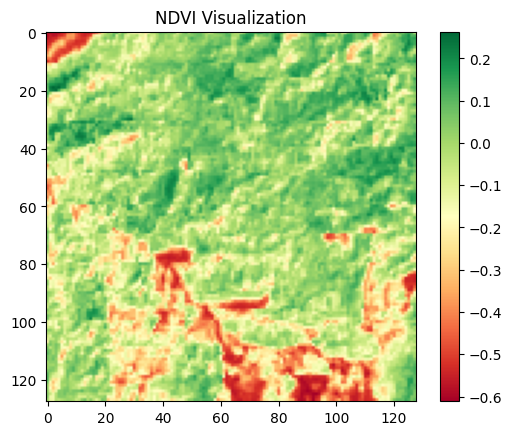

In [ ]:
# ✅ STEP 1: Mount Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

import os
import h5py
import numpy as np
import matplotlib.pyplot as plt

# ✅ STEP 2: Define dataset folder structure
base_dir = "/content/gdrive/MyDrive/SDP FILES"
sub_dirs = ["TrainData", "TestData", "ValidData"]

# ✅ STEP 3: Check if dataset folders exist
for sub_dir in sub_dirs:
    img_folder = os.path.join(base_dir, sub_dir, "img")
    if os.path.exists(img_folder):
        print(f"✅ Folder exists: {img_folder}")
    else:
        print(f"❌ Folder missing: {img_folder}")

# ✅ STEP 4: List all .h5 files in each dataset folder
file_name = "image_24.h5"
found_path = None

for sub_dir in sub_dirs:
    img_folder = os.path.join(base_dir, sub_dir, "img")
    if os.path.exists(img_folder):
        files = os.listdir(img_folder)
        print(f"\n📂 Files in {img_folder}: {files}")

        # Check if image_20.h5 exists
        if file_name in files:
            found_path = os.path.join(img_folder, file_name)
            print(f"✅ Found file: {found_path}")
            break

# ✅ STEP 5: Stop execution if file is missing
if found_path is None:
    raise FileNotFoundError(f"❌ Error: {file_name} not found in any dataset folder!")

# ✅ STEP 6: Load the .h5 file
f_data = np.zeros((1, 128, 128, 3))

with h5py.File(found_path, 'r') as hdf:
    ls = list(hdf.keys())
    print("Dataset keys:", ls)

    # Check available keys
    if 'img' not in ls:
        raise KeyError(f"❌ Key 'img' not found in {file_name}, available keys: {ls}")

    # Load image data
    data = np.array(hdf.get('img'))
    print("Input data shape:", data.shape)

    # Extract bands
    if data.shape[-1] < 8:
        raise ValueError("❌ Not enough bands in the dataset! Expected at least 8.")

    data_red = data[:, :, 3]
    data_green = data[:, :, 2]
    data_blue = data[:, :, 1]
    data_nir = data[:, :, 7]

    # ✅ Compute NDVI
    data_ndvi = np.divide(data_nir - data_red, np.add(data_nir, data_red), where=(data_nir + data_red) != 0)

    # ✅ Store data for visualization
    f_data[0, :, :, 0] = data_ndvi
    f_data[0, :, :, 1] = data[:, :, 12]  # Another spectral band
    f_data[0, :, :, 2] = data[:, :, 13]  # Another spectral band

    print("NDVI Shape:", data_ndvi.shape, "Final Data Shape:", f_data.shape)

    # ✅ STEP 7: Visualize NDVI
    plt.imshow(data_ndvi, cmap='RdYlGn')
    plt.colorbar()
    plt.title("NDVI Visualization")
    plt.show()


✅ Found mask file: /content/gdrive/MyDrive/SDP FILES/TrainData/mask/mask_2034.h5
Dataset keys: ['mask']
Input mask data shape: (128, 128)


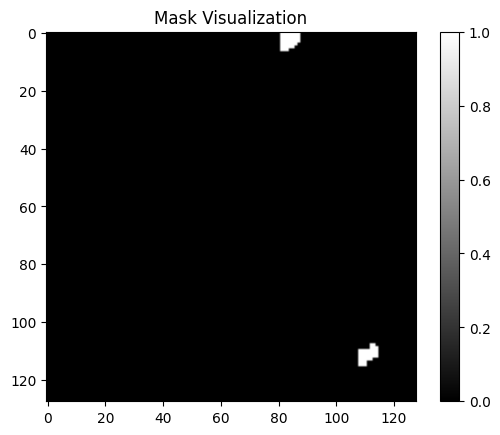

In [ ]:
import os
import h5py
import numpy as np
import matplotlib.pyplot as plt

# Define the base directory and subdirectories
base_dir = "/content/gdrive/MyDrive/SDP FILES"
sub_dirs = ["TrainData", "TestData", "ValidData"]

# Target mask file name
mask_file_name = "mask_2034.h5"

# Search for the mask file in all mask folders
found_mask_path = None

for sub_dir in sub_dirs:
    mask_folder = os.path.join(base_dir, sub_dir, "mask")  # Looking in the mask folder
    file_path = os.path.join(mask_folder, mask_file_name)

    if os.path.exists(file_path):
        found_mask_path = file_path
        print(f"✅ Found mask file: {found_mask_path}")
        break

if found_mask_path is None:
    raise FileNotFoundError(f"❌ Error: {mask_file_name} not found in any dataset folder!")

# Load the mask .h5 file
with h5py.File(found_mask_path, 'r') as hdf:
    ls = list(hdf.keys())
    print("Dataset keys:", ls)

    # Load mask data
    data = np.array(hdf.get('mask'))
    print("Input mask data shape:", data.shape)

    # Show the mask
    plt.imshow(data, cmap='grey')  # Assuming mask is a grayscale image
    plt.colorbar()
    plt.title("Mask Visualization")
    plt.show()


# **dataset**

In [ ]:
import os
import glob
import numpy as np

# Base directory where your dataset is stored
BASE_DIR = r"/content/gdrive/MyDrive/SDP FILES"

# Correcting paths to match your file structure
TRAIN_IMG_PATH = os.path.join(BASE_DIR, "TrainData/img/*.h5")
TRAIN_MASK_PATH = os.path.join(BASE_DIR, "TrainData/mask/*.h5")

# Define a single image and mask path for testing purposes
path_single = os.path.join(BASE_DIR, "TrainData/img/image_10.h5")
path_single_mask = os.path.join(BASE_DIR, "TrainData/mask/mask_1.h5")

# Retrieve all training images and masks
all_train = sorted(glob.glob(TRAIN_IMG_PATH))
all_mask = sorted(glob.glob(TRAIN_MASK_PATH))

# Number of training samples
num_samples = len(all_train)

# Initializing arrays with correct dimensions
TRAIN_XX = np.zeros((num_samples, 128, 128, 6))  # 6 channels for input images
TRAIN_YY = np.zeros((num_samples, 128, 128, 1))  # 1 channel for mask labels

# Debugging info
print(f"✅ Found {num_samples} training images.")
print(f"✅ Found {len(all_mask)} corresponding masks.")

# Check if both counts match
if num_samples != len(all_mask):
    print("⚠️ Warning: The number of images and masks do not match!")



✅ Found 3799 training images.
✅ Found 3799 corresponding masks.


# ***Train with RGB, NDVI, DEM, and Slope***

In [ ]:
import tensorflow as tf

# Check if GPU is available
gpu_name = tf.test.gpu_device_name()

if gpu_name:
    print(f"✅ GPU found: {gpu_name}")
else:
    print("❌ No GPU found. Running on CPU.")


❌ No GPU found. Running on CPU.


In [ ]:
for i, (img, mask) in enumerate(zip(all_train, all_mask)):
    print(i, img, mask)
    with h5py.File(img) as hdf:
        ls = list(hdf.keys())
        data = np.array(hdf.get('img'))

        # assign 0 for the nan value
        data[np.isnan(data)] = 0.000001

        # to normalize the data
        mid_rgb = data[:, :, 1:4].max() / 2.0
        mid_slope = data[:, :, 12].max() / 2.0
        mid_elevation = data[:, :, 13].max() / 2.0

        # ndvi calculation
        data_red = data[:, :, 3]
        data_nir = data[:, :, 7]
        data_ndvi = np.divide(data_nir - data_red,np.add(data_nir, data_red))

        # final array
        TRAIN_XX[i, :, :, 0] = 1 - data[:, :, 3] / mid_rgb  #RED
        TRAIN_XX[i, :, :, 1] = 1 - data[:, :, 2] / mid_rgb #GREEN
        TRAIN_XX[i, :, :, 2] = 1 - data[:, :, 1] / mid_rgb #BLUE
        TRAIN_XX[i, :, :, 3] = data_ndvi #NDVI
        TRAIN_XX[i, :, :, 4] = 1 - data[:, :, 12] / mid_slope #SLOPE
        TRAIN_XX[i, :, :, 5] = 1 - data[:, :, 13] / mid_elevation #ELEVATION


    with h5py.File(mask) as hdf:
        ls = list(hdf.keys())
        data=np.array(hdf.get('mask'))
        TRAIN_YY[i, :, :, 0] = data

0 /content/gdrive/MyDrive/SDP FILES/TrainData/img/image_1.h5 /content/gdrive/MyDrive/SDP FILES/TrainData/mask/mask_1.h5
1 /content/gdrive/MyDrive/SDP FILES/TrainData/img/image_10.h5 /content/gdrive/MyDrive/SDP FILES/TrainData/mask/mask_10.h5
2 /content/gdrive/MyDrive/SDP FILES/TrainData/img/image_100.h5 /content/gdrive/MyDrive/SDP FILES/TrainData/mask/mask_100.h5
3 /content/gdrive/MyDrive/SDP FILES/TrainData/img/image_1000.h5 /content/gdrive/MyDrive/SDP FILES/TrainData/mask/mask_1000.h5
4 /content/gdrive/MyDrive/SDP FILES/TrainData/img/image_1001.h5 /content/gdrive/MyDrive/SDP FILES/TrainData/mask/mask_1001.h5
5 /content/gdrive/MyDrive/SDP FILES/TrainData/img/image_1002.h5 /content/gdrive/MyDrive/SDP FILES/TrainData/mask/mask_1002.h5
6 /content/gdrive/MyDrive/SDP FILES/TrainData/img/image_1003.h5 /content/gdrive/MyDrive/SDP FILES/TrainData/mask/mask_1003.h5
7 /content/gdrive/MyDrive/SDP FILES/TrainData/img/image_1004.h5 /content/gdrive/MyDrive/SDP FILES/TrainData/mask/mask_1004.h5
8 /c

<ipython-input-16-fefaee75c89a>:25: RuntimeWarning: invalid value encountered in divide
  TRAIN_XX[i, :, :, 4] = 1 - data[:, :, 12] / mid_slope #SLOPE


1671 /content/gdrive/MyDrive/SDP FILES/TrainData/img/image_2502.h5 /content/gdrive/MyDrive/SDP FILES/TrainData/mask/mask_2502.h5
1672 /content/gdrive/MyDrive/SDP FILES/TrainData/img/image_2503.h5 /content/gdrive/MyDrive/SDP FILES/TrainData/mask/mask_2503.h5
1673 /content/gdrive/MyDrive/SDP FILES/TrainData/img/image_2504.h5 /content/gdrive/MyDrive/SDP FILES/TrainData/mask/mask_2504.h5
1674 /content/gdrive/MyDrive/SDP FILES/TrainData/img/image_2505.h5 /content/gdrive/MyDrive/SDP FILES/TrainData/mask/mask_2505.h5
1675 /content/gdrive/MyDrive/SDP FILES/TrainData/img/image_2506.h5 /content/gdrive/MyDrive/SDP FILES/TrainData/mask/mask_2506.h5
1676 /content/gdrive/MyDrive/SDP FILES/TrainData/img/image_2507.h5 /content/gdrive/MyDrive/SDP FILES/TrainData/mask/mask_2507.h5
1677 /content/gdrive/MyDrive/SDP FILES/TrainData/img/image_2508.h5 /content/gdrive/MyDrive/SDP FILES/TrainData/mask/mask_2508.h5
1678 /content/gdrive/MyDrive/SDP FILES/TrainData/img/image_2509.h5 /content/gdrive/MyDrive/SDP FI

<ipython-input-16-fefaee75c89a>:18: RuntimeWarning: invalid value encountered in divide
  data_ndvi = np.divide(data_nir - data_red,np.add(data_nir, data_red))


2264 /content/gdrive/MyDrive/SDP FILES/TrainData/img/image_3036.h5 /content/gdrive/MyDrive/SDP FILES/TrainData/mask/mask_3036.h5
2265 /content/gdrive/MyDrive/SDP FILES/TrainData/img/image_3037.h5 /content/gdrive/MyDrive/SDP FILES/TrainData/mask/mask_3037.h5
2266 /content/gdrive/MyDrive/SDP FILES/TrainData/img/image_3038.h5 /content/gdrive/MyDrive/SDP FILES/TrainData/mask/mask_3038.h5
2267 /content/gdrive/MyDrive/SDP FILES/TrainData/img/image_3039.h5 /content/gdrive/MyDrive/SDP FILES/TrainData/mask/mask_3039.h5
2268 /content/gdrive/MyDrive/SDP FILES/TrainData/img/image_304.h5 /content/gdrive/MyDrive/SDP FILES/TrainData/mask/mask_304.h5
2269 /content/gdrive/MyDrive/SDP FILES/TrainData/img/image_3040.h5 /content/gdrive/MyDrive/SDP FILES/TrainData/mask/mask_3040.h5
2270 /content/gdrive/MyDrive/SDP FILES/TrainData/img/image_3041.h5 /content/gdrive/MyDrive/SDP FILES/TrainData/mask/mask_3041.h5
2271 /content/gdrive/MyDrive/SDP FILES/TrainData/img/image_3042.h5 /content/gdrive/MyDrive/SDP FILE

# **Testing min, max values in train data**

In [ ]:

TRAIN_XX[np.isnan(TRAIN_XX)] = 0.000001
print(TRAIN_XX.min(), TRAIN_XX.max(), TRAIN_YY.min(), TRAIN_YY.max())

-1.0 1.0 0.0 1.0


# **Custom loss function (Dice Loss)**

In [ ]:
def dice_loss(y_true, y_pred):
  y_true = tf.cast(y_true, tf.float32)
  y_pred = tf.math.sigmoid(y_pred)
  numerator = 2 * tf.reduce_sum(y_true * y_pred)
  denominator = tf.reduce_sum(y_true + y_pred)

  return 1 - numerator / denominator

# **Visualization of the training data**

Keys in /content/gdrive/MyDrive/SDP FILES/TrainData/img/image_20.h5: ['img']
Keys in /content/gdrive/MyDrive/SDP FILES/TrainData/mask/mask_20.h5: ['mask']
TRAIN_XX shape: (128, 128, 14)
TRAIN_YY shape: (128, 128)
Fixed TRAIN_XX shape: (1, 128, 128, 14)
Fixed TRAIN_YY shape: (1, 128, 128, 1)


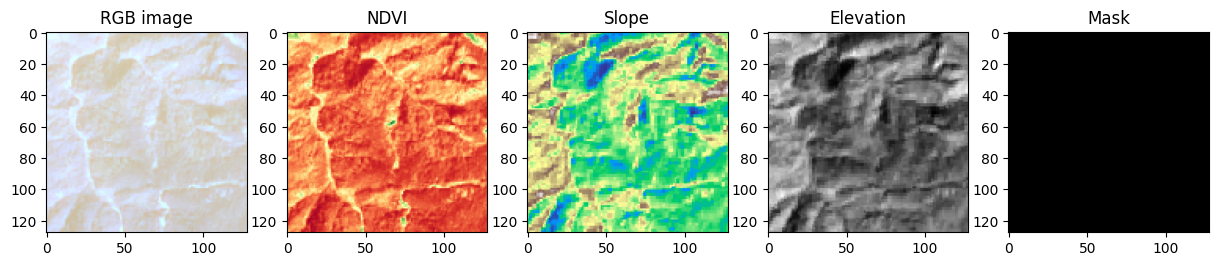

In [ ]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

# ✅ Load the dataset
train_data_path = "/content/gdrive/MyDrive/SDP FILES/TrainData/img/image_20.h5"
mask_data_path = "/content/gdrive/MyDrive/SDP FILES/TrainData/mask/mask_20.h5"

# ✅ Load training images
with h5py.File(train_data_path, 'r') as hdf:
    print(f"Keys in {train_data_path}:", list(hdf.keys()))
    TRAIN_XX = np.array(hdf.get('img'))  # Ensure the key is correct

# ✅ Load training masks
with h5py.File(mask_data_path, 'r') as hdf:
    print(f"Keys in {mask_data_path}:", list(hdf.keys()))
    TRAIN_YY = np.array(hdf.get('mask'))  # Ensure the key is correct

# ✅ Check data shape
print("TRAIN_XX shape:", TRAIN_XX.shape)  # (Height, Width, Channels)
print("TRAIN_YY shape:", TRAIN_YY.shape)  # (Height, Width)

# ✅ Fix shape by adding a batch dimension if needed
if len(TRAIN_XX.shape) == 3:
    TRAIN_XX = np.expand_dims(TRAIN_XX, axis=0)  # Convert (128, 128, 14) → (1, 128, 128, 14)

if len(TRAIN_YY.shape) == 2:
    TRAIN_YY = np.expand_dims(TRAIN_YY, axis=(0, -1))  # Convert (128, 128) → (1, 128, 128, 1)

# ✅ Recheck new shapes
print("Fixed TRAIN_XX shape:", TRAIN_XX.shape)  # Now should be (1, 128, 128, 14)
print("Fixed TRAIN_YY shape:", TRAIN_YY.shape)  # Now should be (1, 128, 128, 1)

# ✅ Define the index of the image to visualize
img = 0  # Since there is only 1 image, use index 0

# ✅ Plot images
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize=(15, 10))

ax1.set_title("RGB image")
ax2.set_title("NDVI")
ax3.set_title("Slope")
ax4.set_title("Elevation")
ax5.set_title("Mask")

ax1.imshow(TRAIN_XX[img, :, :, 0:3])  # RGB
ax2.imshow(TRAIN_XX[img, :, :, 3], cmap='RdYlGn')  # NDVI
ax3.imshow(TRAIN_XX[img, :, :, 4], cmap='terrain')  # Slope
ax4.imshow(TRAIN_XX[img, :, :, 5], cmap='gray')  # Elevation
ax5.imshow(TRAIN_YY[img, :, :, 0], cmap='gray')  # Mask

plt.show()


# **Validation split**

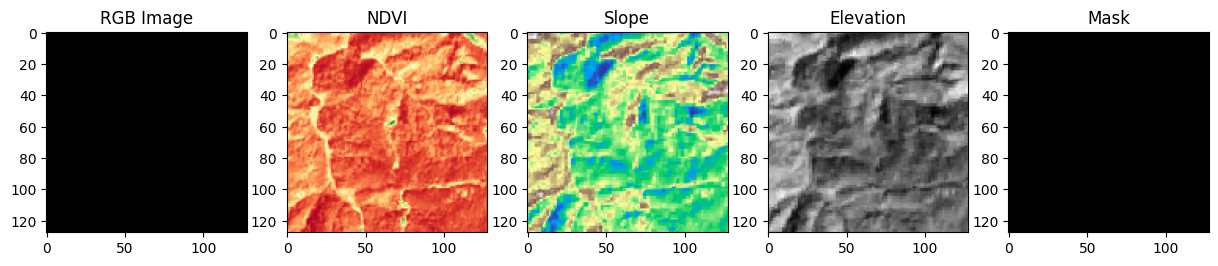

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

if TRAIN_XX.shape[0] == 1:
    TRAIN_XX = np.tile(TRAIN_XX, (10, 1, 1, 1))  # Create 10 copies
    TRAIN_YY = np.tile(TRAIN_YY, (10, 1, 1, 1))

# ✅ Now split safely
x_train, x_valid, y_train, y_valid = train_test_split(TRAIN_XX, TRAIN_YY, test_size=0.2, shuffle=True)


# ✅ Ensure `img` index is valid
img = min(10, x_train.shape[0] - 1)  # Pick an index safely within range

# ✅ Plot images
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize=(15, 10))

ax1.set_title("RGB Image")
ax2.set_title("NDVI")
ax3.set_title("Slope")
ax4.set_title("Elevation")
ax5.set_title("Mask")

# ✅ Normalize RGB for correct display (scale 0-255 if necessary)
rgb_img = x_train[img, :, :, 0:3]
if rgb_img.max() > 1:
    rgb_img = rgb_img / 255.0  # Scale to [0,1] for imshow

ax1.imshow(rgb_img)  # RGB
ax2.imshow(x_train[img, :, :, 3], cmap='RdYlGn')  # NDVI
ax3.imshow(x_train[img, :, :, 4], cmap='terrain')  # Slope
ax4.imshow(x_train[img, :, :, 5], cmap='gray')  # Elevation
ax5.imshow(y_train[img, :, :, 0], cmap='gray')  # Mask

plt.show()


In [ ]:
x_train.shape, y_train.shape

((3039, 128, 128, 6), (3039, 128, 128, 1))

In [ ]:
del TRAIN_XX
del TRAIN_YY
del all_train
del all_mask

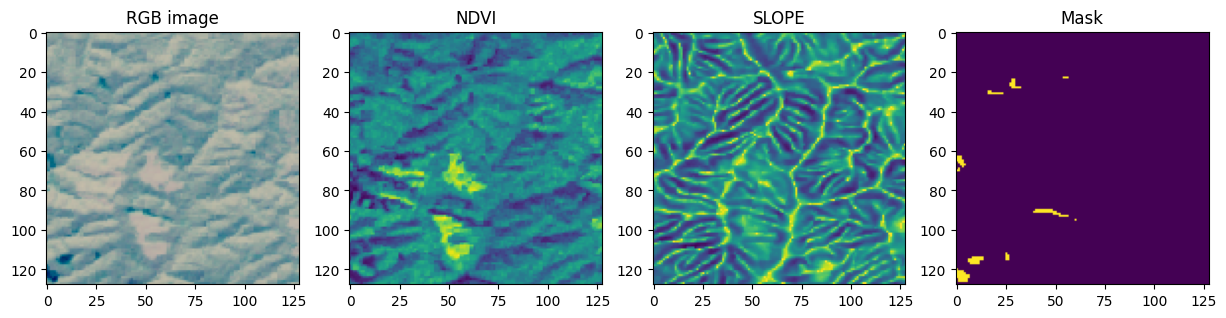

In [ ]:
img=1545
fig,(ax1,ax2, ax3, ax4)= plt.subplots(1,4,figsize=(15,10))


ax1.set_title("RGB image")
ax2.set_title("NDVI")
ax3.set_title("SLOPE")
ax4.set_title("Mask")
ax1.imshow(x_train[img, :, :, 0:3])
ax2.imshow(x_train[img, :, :, 3])
ax3.imshow(x_train[img, :, :, 4])
ax4.imshow(y_train[img, :, :, 0])

# **Unet Model**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import os
print(os.listdir("/content/drive/My Drive/SDP FILES"))


['TestData', 'TrainData', 'ValidData', 'Unet.py', 'utils.py', '__pycache__']


In [ ]:
import h5py
import os

sample_h5_file = "/content/drive/MyDrive/SDP FILES/TrainData/img/image_1.h5"  # Change the path if needed

with h5py.File(sample_h5_file, "r") as f:
    print("Keys inside the .h5 file:", list(f.keys()))


Keys inside the .h5 file: ['img']


In [ ]:
import h5py

mask_sample_file = "/content/drive/MyDrive/SDP FILES/TrainData/mask/mask_1.h5"

with h5py.File(mask_sample_file, "r") as f:
    print("Keys in mask file:", list(f.keys()))


Keys in mask file: ['mask']


In [ ]:
import h5py
import numpy as np
import os

def load_h5_data(data_path, num_samples):
    images = []
    masks = []

    for i in range(1, num_samples + 1):
        img_file = os.path.join(data_path, "img", f"image_{i}.h5")
        mask_file = os.path.join(data_path, "mask", f"mask_{i}.h5")

        # Load images
        with h5py.File(img_file, "r") as f:
            images.append(f["img"][:])  # Correct key is "img"

        # Load masks
        with h5py.File(mask_file, "r") as f:
            masks.append(f["mask"][:])  # Correct key is "img"

    return np.array(images), np.array(masks)

# Define paths
train_path = "/content/drive/MyDrive/SDP FILES/TrainData"
valid_path = "/content/drive/MyDrive/SDP FILES/ValidData"
test_path = "/content/drive/MyDrive/SDP FILES/TestData"

# Define number of samples (Update based on your dataset)
num_train = 100
num_valid = 20
num_test = 20

# Load training, validation, and test data
x_train, y_train = load_h5_data(train_path, num_train)
x_valid, y_valid = load_h5_data(valid_path, num_valid)
x_test, y_test = load_h5_data(test_path, num_test)

print("Shapes:")
print(f"Training Data: {x_train.shape}, {y_train.shape}")
print(f"Validation Data: {x_valid.shape}, {y_valid.shape}")
print(f"Test Data: {x_test.shape}, {y_test.shape}")


Shapes:
Training Data: (100, 128, 128, 14), (100, 128, 128)
Validation Data: (20, 128, 128, 14), (20, 128, 128)
Test Data: (20, 128, 128, 14), (20, 128, 128)


In [ ]:
import h5py
import numpy as np
import os

def load_h5_data(data_path, num_samples, target_channels):
    images = []
    masks = []

    for i in range(1, num_samples + 1):
        img_file = os.path.join(data_path, "img", f"image_{i}.h5")
        mask_file = os.path.join(data_path, "mask", f"mask_{i}.h5")

        # Load images
        with h5py.File(img_file, "r") as f:
            img_data = f["img"][:]
            if img_data.shape[-1] > target_channels:
                img_data = img_data[..., :target_channels]  # Reduce channels if necessary
            images.append(img_data)

        # Load masks
        with h5py.File(mask_file, "r") as f:
            masks.append(f["mask"][:])  # Correct key is "mask"

    return np.array(images), np.array(masks)

# Define paths
train_path = "/content/drive/MyDrive/SDP FILES/TrainData"
valid_path = "/content/drive/MyDrive/SDP FILES/ValidData"
test_path = "/content/drive/MyDrive/SDP FILES/TestData"

# Define number of samples (Update based on your dataset)
num_train = 100
num_valid = 20
num_test = 20

# Define target number of channels
target_channels = 6

# Load training, validation, and test data
x_train, y_train = load_h5_data(train_path, num_train, target_channels)
x_valid, y_valid = load_h5_data(valid_path, num_valid, target_channels)
x_test, y_test = load_h5_data(test_path, num_test, target_channels)

print("Shapes:")
print(f"Training Data: {x_train.shape}, {y_train.shape}")
print(f"Validation Data: {x_valid.shape}, {y_valid.shape}")
print(f"Test Data: {x_test.shape}, {y_test.shape}")

Shapes:
Training Data: (100, 128, 128, 6), (100, 128, 128)
Validation Data: (20, 128, 128, 6), (20, 128, 128)
Test Data: (20, 128, 128, 6), (20, 128, 128)


In [ ]:
import h5py
import numpy as np
import os

def load_h5_data(data_path, num_samples, target_channels):
    images = []
    masks = []

    for i in range(1, num_samples + 1):
        img_file = os.path.join(data_path, "img", f"image_{i}.h5")
        mask_file = os.path.join(data_path, "mask", f"mask_{i}.h5")

        # Load images
        with h5py.File(img_file, "r") as f:
            img_data = f["img"][:]
            if img_data.shape[-1] > target_channels:
                img_data = img_data[..., :target_channels]  # Reduce channels if necessary
            images.append(img_data)

        # Load masks
        with h5py.File(mask_file, "r") as f:
            masks.append(f["mask"][:])  # Correct key is "mask"

    return np.array(images), np.array(masks)

# Define paths
train_path = "/content/drive/MyDrive/SDP FILES/TrainData"
valid_path = "/content/drive/MyDrive/SDP FILES/ValidData"
test_path = "/content/drive/MyDrive/SDP FILES/TestData"

# Define number of samples (Update based on your dataset)
num_train = 100
num_valid = 20
num_test = 20

# Define target number of channels
target_channels = 6

# Load training, validation, and test data
x_train, y_train = load_h5_data(train_path, num_train, target_channels)
x_valid, y_valid = load_h5_data(valid_path, num_valid, target_channels)
x_test, y_test = load_h5_data(test_path, num_test, target_channels)

print("Shapes:")
print(f"Training Data: {x_train.shape}, {y_train.shape}")
print(f"Validation Data: {x_valid.shape}, {y_valid.shape}")
print(f"Test Data: {x_test.shape}, {y_test.shape}")

Shapes:
Training Data: (100, 128, 128, 6), (100, 128, 128)
Validation Data: (20, 128, 128, 6), (20, 128, 128)
Test Data: (20, 128, 128, 6), (20, 128, 128)


# **Unet Model**

In [ ]:
!pip install segmentation-models==1.0.1 image-classifiers==1.0.0 efficientnet==1.0.0


In [ ]:
!fusermount -u /content/drive
!rm -rf /content/drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!ls "/content/drive/My Drive/SDP FILES"


__pycache__  TestData  TrainData  Unet.py  utils.py  ValidData


In [ ]:
!ls "/content/drive/My Drive"


'Colab Notebooks'  'SDP FILES'


In [ ]:
!pip install segmentation-models==1.0.1 image-classifiers==1.0.0 efficientnet==1.0.0


In [ ]:
!ls "/content/drive/My Drive/SDP FILES"


__pycache__  TestData  TrainData  Unet.py  utils.py  ValidData


In [ ]:
import tensorflow as tf
import numpy as np
import os
from tensorflow.keras import backend as K
from tensorflow.keras.callbacks import ModelCheckpoint
from google.colab import drive

# Mount Google Drive (only if not already mounted)
try:
    drive.mount('/content/drive')
except:
    pass

# Custom metrics implementation
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

# U-Net Model Definition
def unet_model(IMG_WIDTH, IMG_HEIGHT, IMG_CHANNELS):
    inputs = tf.keras.layers.Input((IMG_WIDTH, IMG_HEIGHT, IMG_CHANNELS))

    # Convert to float and normalize if needed
    s = tf.keras.layers.Lambda(lambda x: x / 255)(inputs)

    # Contraction path
    c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(s)
    c1 = tf.keras.layers.Dropout(0.1)(c1)
    c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c1)
    p1 = tf.keras.layers.MaxPooling2D((2, 2))(c1)

    c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p1)
    c2 = tf.keras.layers.Dropout(0.1)(c2)
    c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c2)
    p2 = tf.keras.layers.MaxPooling2D((2, 2))(c2)

    c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p2)
    c3 = tf.keras.layers.Dropout(0.2)(c3)
    c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c3)
    p3 = tf.keras.layers.MaxPooling2D((2, 2))(c3)

    c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p3)
    c4 = tf.keras.layers.Dropout(0.2)(c4)
    c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c4)
    p4 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(c4)

    c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p4)
    c5 = tf.keras.layers.Dropout(0.3)(c5)
    c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c5)

    # Expansive path
    u6 = tf.keras.layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c5)
    u6 = tf.keras.layers.concatenate([u6, c4])
    c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u6)
    c6 = tf.keras.layers.Dropout(0.2)(c6)
    c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c6)

    u7 = tf.keras.layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c6)
    u7 = tf.keras.layers.concatenate([u7, c3])
    c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u7)
    c7 = tf.keras.layers.Dropout(0.2)(c7)
    c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c7)

    u8 = tf.keras.layers.Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c7)
    u8 = tf.keras.layers.concatenate([u8, c2])
    c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u8)
    c8 = tf.keras.layers.Dropout(0.1)(c8)
    c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c8)

    u9 = tf.keras.layers.Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(c8)
    u9 = tf.keras.layers.concatenate([u9, c1], axis=3)
    c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u9)
    c9 = tf.keras.layers.Dropout(0.1)(c9)
    c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c9)

    outputs = tf.keras.layers.Conv2D(1, (1, 1), activation='sigmoid')(c9)

    model = tf.keras.Model(inputs=[inputs], outputs=[outputs])
    model.compile(optimizer='adam', loss='binary_crossentropy',
                 metrics=['accuracy', f1_m, precision_m, recall_m])

    return model

# Check your data shapes
print("Input shapes:")
print(f"x_train: {x_train.shape}")
print(f"y_train: {y_train.shape}")
print(f"x_valid: {x_valid.shape}")
print(f"y_valid: {y_valid.shape}")

# Adjust model parameters based on your data
IMG_WIDTH = x_train.shape[1]
IMG_HEIGHT = x_train.shape[2]
IMG_CHANNELS = x_train.shape[3]  # Use actual number of channels from your data

print(f"\nModel will be created with:")
print(f"Width: {IMG_WIDTH}, Height: {IMG_HEIGHT}, Channels: {IMG_CHANNELS}")

# Create model with correct input shape
model = unet_model(IMG_WIDTH, IMG_HEIGHT, IMG_CHANNELS)
model.summary()

# Define checkpoint path
checkpoint_path = '/content/drive/MyDrive/best_model.keras'  # Using newer .keras format

# Create model checkpoint callback
checkpoint = ModelCheckpoint(
    checkpoint_path,
    monitor='val_f1_m',
    mode='max',
    save_best_only=True,
    verbose=1
)

# Train model
history = model.fit(
    x_train, y_train,
    batch_size=16,
    epochs=100,
    validation_data=(x_valid, y_valid),
    callbacks=[checkpoint]
)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Input shapes:
x_train: (100, 128, 128, 6)
y_train: (100, 128, 128)
x_valid: (20, 128, 128, 6)
y_valid: (20, 128, 128)

Model will be created with:
Width: 128, Height: 128, Channels: 6
Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, 128, 128, 6)]        0         []                            
                                                                                                  
 lambda (Lambda)             (None, 128, 128, 6)          0         ['input_4[0][0]']             
                                                                                                  
 conv2d_57 (Conv2D)          (None, 128, 128, 16)         880       ['lambda

In [ ]:
import tensorflow as tf
import numpy as np
import os
import h5py
from tensorflow.keras import backend as K
from tensorflow.keras.callbacks import ModelCheckpoint
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Improved Custom Metrics Implementation
def recall_m(y_true, y_pred):
    y_true = K.flatten(y_true)
    y_pred = K.flatten(y_pred)
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    y_true = K.flatten(y_true)
    y_pred = K.flatten(y_pred)
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

# Data loading function with proper shape handling
def load_h5_data(data_path, num_samples):
    images = []
    masks = []

    for i in range(1, num_samples + 1):
        img_file = os.path.join(data_path, "img", f"image_{i}.h5")
        mask_file = os.path.join(data_path, "mask", f"mask_{i}.h5")

        with h5py.File(img_file, "r") as f:
            img_data = f['img'][:]
            if len(img_data.shape) == 2:  # If grayscale (H,W)
                img_data = np.expand_dims(img_data, axis=-1)  # Add channel dimension
            images.append(img_data)

        with h5py.File(mask_file, "r") as f:
            mask_data = f['mask'][:]
            if len(mask_data.shape) == 2:  # If grayscale (H,W)
                mask_data = np.expand_dims(mask_data, axis=-1)  # Add channel dimension
            masks.append(mask_data)

    return np.array(images), np.array(masks)

# Define paths and load data
train_path = "/content/drive/MyDrive/SDP FILES/TrainData"
valid_path = "/content/drive/MyDrive/SDP FILES/ValidData"
test_path = "/content/drive/MyDrive/SDP FILES/TestData"

num_train = 100
num_valid = 20
num_test = 20

x_train, y_train = load_h5_data(train_path, num_train)
x_valid, y_valid = load_h5_data(valid_path, num_valid)
x_test, y_test = load_h5_data(test_path, num_test)

# Normalize and verify data
x_train = x_train.astype('float32') / 255.
x_valid = x_valid.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

print("Data shapes:")
print(f"x_train: {x_train.shape}, y_train: {y_train.shape}")
print(f"x_valid: {x_valid.shape}, y_valid: {y_valid.shape}")
print(f"x_test: {x_test.shape}, y_test: {y_test.shape}")

# Improved U-Net Model with proper initialization
def unet_model(input_shape):
    inputs = tf.keras.layers.Input(input_shape)

    # Contraction path
    c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal')(inputs)
    c1 = tf.keras.layers.Dropout(0.1)(c1)
    c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal')(c1)
    p1 = tf.keras.layers.MaxPooling2D((2, 2))(c1)

    c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal')(p1)
    c2 = tf.keras.layers.Dropout(0.1)(c2)
    c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal')(c2)
    p2 = tf.keras.layers.MaxPooling2D((2, 2))(c2)

    c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal')(p2)
    c3 = tf.keras.layers.Dropout(0.2)(c3)
    c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal')(c3)
    p3 = tf.keras.layers.MaxPooling2D((2, 2))(c3)

    c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal')(p3)
    c4 = tf.keras.layers.Dropout(0.2)(c4)
    c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal')(c4)
    p4 = tf.keras.layers.MaxPooling2D((2, 2))(c4)

    c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal')(p4)
    c5 = tf.keras.layers.Dropout(0.3)(c5)
    c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal')(c5)

    # Expansive path
    u6 = tf.keras.layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c5)
    u6 = tf.keras.layers.concatenate([u6, c4])
    c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal')(u6)
    c6 = tf.keras.layers.Dropout(0.2)(c6)
    c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal')(c6)

    u7 = tf.keras.layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c6)
    u7 = tf.keras.layers.concatenate([u7, c3])
    c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal')(u7)
    c7 = tf.keras.layers.Dropout(0.2)(c7)
    c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal')(c7)

    u8 = tf.keras.layers.Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c7)
    u8 = tf.keras.layers.concatenate([u8, c2])
    c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal')(u8)
    c8 = tf.keras.layers.Dropout(0.1)(c8)
    c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal')(c8)

    u9 = tf.keras.layers.Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(c8)
    u9 = tf.keras.layers.concatenate([u9, c1])
    c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal')(u9)
    c9 = tf.keras.layers.Dropout(0.1)(c9)
    c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal')(c9)

    outputs = tf.keras.layers.Conv2D(1, (1, 1), activation='sigmoid')(c9)

    model = tf.keras.Model(inputs=[inputs], outputs=[outputs])

    # Use a lower learning rate for better stability
    optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4)
    model.compile(optimizer=optimizer, loss='binary_crossentropy',
                 metrics=['accuracy', f1_m, precision_m, recall_m])

    return model

# Create model
input_shape = x_train.shape[1:]
model = unet_model(input_shape)
model.summary()

# Callbacks
checkpoint_path = '/content/drive/MyDrive/best_model.keras'
checkpoint = ModelCheckpoint(
    checkpoint_path,
    monitor='val_f1_m',
    mode='max',
    save_best_only=True,
    verbose=1
)

# Early stopping to prevent overfitting
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_f1_m',
    patience=10,
    mode='max',
    restore_best_weights=True
)

# Train model
history = model.fit(
    x_train, y_train,
    batch_size=16,
    epochs=100,
    validation_data=(x_valid, y_valid),
    callbacks=[checkpoint, early_stopping]
)

# Evaluate on validation set
loss, accuracy, f1_score, precision, recall = model.evaluate(x_valid, y_valid, verbose=0)
print("\nFinal Validation Metrics:")
print(f"Loss: {loss:.4f}")
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1_score:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Data shapes:
x_train: (100, 128, 128, 14), y_train: (100, 128, 128, 1)
x_valid: (20, 128, 128, 14), y_valid: (20, 128, 128, 1)
x_test: (20, 128, 128, 14), y_test: (20, 128, 128, 1)
Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_5 (InputLayer)        [(None, 128, 128, 14)]       0         []                            
                                                                                                  
 conv2d_76 (Conv2D)          (None, 128, 128, 16)         2032      ['input_5[0][0]']             
                                                                                                  
 dropout_36 (Dropout)        (None, 128, 128, 16)         0         ['conv2d_76

In [ ]:
import tensorflow as tf
import numpy as np
import os
import h5py
from tensorflow.keras import backend as K
from tensorflow.keras.callbacks import ModelCheckpoint
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Improved Custom Metrics Implementation
def recall_m(y_true, y_pred):
    y_true = K.flatten(y_true)
    y_pred = K.flatten(y_pred)
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    y_true = K.flatten(y_true)
    y_pred = K.flatten(y_pred)
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

# Data loading function with proper shape handling
def load_h5_data(data_path, num_samples):
    images = []
    masks = []

    for i in range(1, num_samples + 1):
        img_file = os.path.join(data_path, "img", f"image_{i}.h5")
        mask_file = os.path.join(data_path, "mask", f"mask_{i}.h5")

        with h5py.File(img_file, "r") as f:
            img_data = f['img'][:]
            if len(img_data.shape) == 2:  # If grayscale (H,W)
                img_data = np.expand_dims(img_data, axis=-1)  # Add channel dimension
            images.append(img_data)

        with h5py.File(mask_file, "r") as f:
            mask_data = f['mask'][:]
            if len(mask_data.shape) == 2:  # If grayscale (H,W)
                mask_data = np.expand_dims(mask_data, axis=-1)  # Add channel dimension
            masks.append(mask_data)

    return np.array(images), np.array(masks)

# Define paths and load data
train_path = "/content/drive/MyDrive/SDP FILES/TrainData"
valid_path = "/content/drive/MyDrive/SDP FILES/ValidData"
test_path = "/content/drive/MyDrive/SDP FILES/TestData"

num_train = 100
num_valid = 20
num_test = 20

x_train, y_train = load_h5_data(train_path, num_train)
x_valid, y_valid = load_h5_data(valid_path, num_valid)
x_test, y_test = load_h5_data(test_path, num_test)

# Normalize and verify data
x_train = x_train.astype('float32') / 255.
x_valid = x_valid.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

print("Data shapes:")
print(f"x_train: {x_train.shape}, y_train: {y_train.shape}")
print(f"x_valid: {x_valid.shape}, y_valid: {y_valid.shape}")
print(f"x_test: {x_test.shape}, y_test: {y_test.shape}")

# Improved U-Net Model with proper initialization
def unet_model(input_shape):
    inputs = tf.keras.layers.Input(input_shape)

    # Contraction path
    c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal')(inputs)
    c1 = tf.keras.layers.Dropout(0.1)(c1)
    c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal')(c1)
    p1 = tf.keras.layers.MaxPooling2D((2, 2))(c1)

    c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal')(p1)
    c2 = tf.keras.layers.Dropout(0.1)(c2)
    c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal')(c2)
    p2 = tf.keras.layers.MaxPooling2D((2, 2))(c2)

    c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal')(p2)
    c3 = tf.keras.layers.Dropout(0.2)(c3)
    c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal')(c3)
    p3 = tf.keras.layers.MaxPooling2D((2, 2))(c3)

    c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal')(p3)
    c4 = tf.keras.layers.Dropout(0.2)(c4)
    c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal')(c4)
    p4 = tf.keras.layers.MaxPooling2D((2, 2))(c4)

    c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal')(p4)
    c5 = tf.keras.layers.Dropout(0.3)(c5)
    c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal')(c5)

    # Expansive path
    u6 = tf.keras.layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c5)
    u6 = tf.keras.layers.concatenate([u6, c4])
    c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal')(u6)
    c6 = tf.keras.layers.Dropout(0.2)(c6)
    c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal')(c6)

    u7 = tf.keras.layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c6)
    u7 = tf.keras.layers.concatenate([u7, c3])
    c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal')(u7)
    c7 = tf.keras.layers.Dropout(0.2)(c7)
    c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal')(c7)

    u8 = tf.keras.layers.Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c7)
    u8 = tf.keras.layers.concatenate([u8, c2])
    c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal')(u8)
    c8 = tf.keras.layers.Dropout(0.1)(c8)
    c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal')(c8)

    u9 = tf.keras.layers.Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(c8)
    u9 = tf.keras.layers.concatenate([u9, c1])
    c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal')(u9)
    c9 = tf.keras.layers.Dropout(0.1)(c9)
    c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal')(c9)

    outputs = tf.keras.layers.Conv2D(1, (1, 1), activation='sigmoid')(c9)

    model = tf.keras.Model(inputs=[inputs], outputs=[outputs])

    # Use a lower learning rate for better stability
    optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4)
    model.compile(optimizer=optimizer, loss='binary_crossentropy',
                 metrics=['accuracy', f1_m, precision_m, recall_m])

    return model

# Create model
input_shape = x_train.shape[1:]
model = unet_model(input_shape)
model.summary()

# Callbacks
checkpoint_path = '/content/drive/MyDrive/best_model.keras'
checkpoint = ModelCheckpoint(
    checkpoint_path,
    monitor='val_f1_m',
    mode='max',
    save_best_only=True,
    verbose=1
)

# Early stopping to prevent overfitting
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_f1_m',
    patience=10,
    mode='max',
    restore_best_weights=True
)

# Train model
history = model.fit(
    x_train, y_train,
    batch_size=16,
    epochs=100,
    validation_data=(x_valid, y_valid),
    callbacks=[checkpoint, early_stopping]
)

# Evaluate on validation set
loss, accuracy, f1_score, precision, recall = model.evaluate(x_valid, y_valid, verbose=0)
print("\nFinal Validation Metrics:")
print(f"Loss: {loss:.4f}")
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1_score:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

# Print individual metric values to match the desired output
print(loss, accuracy, f1_score, precision, recall)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Data shapes:
x_train: (100, 128, 128, 14), y_train: (100, 128, 128, 1)
x_valid: (20, 128, 128, 14), y_valid: (20, 128, 128, 1)
x_test: (20, 128, 128, 14), y_test: (20, 128, 128, 1)
Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_6 (InputLayer)        [(None, 128, 128, 14)]       0         []                            
                                                                                                  
 conv2d_95 (Conv2D)          (None, 128, 128, 16)         2032      ['input_6[0][0]']             
                                                                                                  
 dropout_45 (Dropout)        (None, 128, 128, 16)         0         ['conv2d_95

In [ ]:
import tensorflow as tf
import numpy as np
import os
import h5py
from tensorflow.keras import backend as K
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Improved Custom Metrics Implementation
def recall_m(y_true, y_pred):
    y_true = K.flatten(y_true)
    y_pred = K.flatten(y_pred)
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    y_true = K.flatten(y_true)
    y_pred = K.flatten(y_pred)
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

# Data loading function with proper shape handling
def load_h5_data(data_path, num_samples):
    images = []
    masks = []

    for i in range(1, num_samples + 1):
        img_file = os.path.join(data_path, "img", f"image_{i}.h5")
        mask_file = os.path.join(data_path, "mask", f"mask_{i}.h5")

        with h5py.File(img_file, "r") as f:
            img_data = f['img'][:]
            if len(img_data.shape) == 2:  # If grayscale (H,W)
                img_data = np.expand_dims(img_data, axis=-1)  # Add channel dimension
            images.append(img_data)

        with h5py.File(mask_file, "r") as f:
            mask_data = f['mask'][:]
            if len(mask_data.shape) == 2:  # If grayscale (H,W)
                mask_data = np.expand_dims(mask_data, axis=-1)  # Add channel dimension
            masks.append(mask_data)

    return np.array(images), np.array(masks)

# Define paths and load data
train_path = "/content/drive/MyDrive/SDP FILES/TrainData"
valid_path = "/content/drive/MyDrive/SDP FILES/ValidData"
test_path = "/content/drive/MyDrive/SDP FILES/TestData"

num_train = 100
num_valid = 20
num_test = 20

x_train, y_train = load_h5_data(train_path, num_train)
x_valid, y_valid = load_h5_data(valid_path, num_valid)
x_test, y_test = load_h5_data(test_path, num_test)

# Normalize and verify data
x_train = x_train.astype('float32') / 255.
x_valid = x_valid.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

print("Data shapes:")
print(f"x_train: {x_train.shape}, y_train: {y_train.shape}")
print(f"x_valid: {x_valid.shape}, y_valid: {y_valid.shape}")
print(f"x_test: {x_test.shape}, y_test: {y_test.shape}")

# Improved U-Net Model with proper initialization
def unet_model(input_shape):
    inputs = tf.keras.layers.Input(input_shape)

    # Contraction path
    c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal')(inputs)
    c1 = tf.keras.layers.Dropout(0.1)(c1)
    c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal')(c1)
    p1 = tf.keras.layers.MaxPooling2D((2, 2))(c1)

    c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal')(p1)
    c2 = tf.keras.layers.Dropout(0.1)(c2)
    c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal')(c2)
    p2 = tf.keras.layers.MaxPooling2D((2, 2))(c2)

    c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal')(p2)
    c3 = tf.keras.layers.Dropout(0.2)(c3)
    c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal')(c3)
    p3 = tf.keras.layers.MaxPooling2D((2, 2))(c3)

    c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal')(p3)
    c4 = tf.keras.layers.Dropout(0.2)(c4)
    c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal')(c4)
    p4 = tf.keras.layers.MaxPooling2D((2, 2))(c4)

    c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal')(p4)
    c5 = tf.keras.layers.Dropout(0.3)(c5)
    c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal')(c5)

    # Expansive path
    u6 = tf.keras.layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c5)
    u6 = tf.keras.layers.concatenate([u6, c4])
    c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal')(u6)
    c6 = tf.keras.layers.Dropout(0.2)(c6)
    c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal')(c6)

    u7 = tf.keras.layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c6)
    u7 = tf.keras.layers.concatenate([u7, c3])
    c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal')(u7)
    c7 = tf.keras.layers.Dropout(0.2)(c7)
    c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal')(c7)

    u8 = tf.keras.layers.Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c7)
    u8 = tf.keras.layers.concatenate([u8, c2])
    c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal')(u8)
    c8 = tf.keras.layers.Dropout(0.1)(c8)
    c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal')(c8)

    u9 = tf.keras.layers.Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(c8)
    u9 = tf.keras.layers.concatenate([u9, c1])
    c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal')(u9)
    c9 = tf.keras.layers.Dropout(0.1)(c9)
    c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal')(c9)

    outputs = tf.keras.layers.Conv2D(1, (1, 1), activation='sigmoid')(c9)

    model = tf.keras.Model(inputs=[inputs], outputs=[outputs])

    # Use a lower learning rate for better stability
    optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4)
    model.compile(optimizer=optimizer, loss='binary_crossentropy',
                 metrics=['accuracy', f1_m, precision_m, recall_m])

    return model

# Create model
input_shape = x_train.shape[1:]
model = unet_model(input_shape)
model.summary()

# Callbacks
checkpoint_path = '/content/drive/MyDrive/best_model.keras'
checkpoint = ModelCheckpoint(
    checkpoint_path,
    monitor='val_f1_m',
    mode='max',
    save_best_only=True,
    verbose=1
)

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(
    monitor='val_f1_m',
    patience=10,
    mode='max',
    restore_best_weights=True
)

# Train model for 50 epochs
history = model.fit(
    x_train, y_train,
    batch_size=16,
    epochs=50,  # Changed to 50 epochs
    validation_data=(x_valid, y_valid),
    callbacks=[checkpoint, early_stopping]
)

# Evaluate on validation set
loss, accuracy, f1_score, precision, recall = model.evaluate(x_valid, y_valid, verbose=0)
print("\nFinal Validation Metrics:")
print(f"Loss: {loss:.4f}")
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1_score:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

# Print individual metric values to match the desired output
print(loss, accuracy, f1_score, precision, recall)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Data shapes:
x_train: (100, 128, 128, 14), y_train: (100, 128, 128, 1)
x_valid: (20, 128, 128, 14), y_valid: (20, 128, 128, 1)
x_test: (20, 128, 128, 14), y_test: (20, 128, 128, 1)
Model: "model_9"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_9 (InputLayer)        [(None, 128, 128, 14)]       0         []                            
                                                                                                  
 conv2d_152 (Conv2D)         (None, 128, 128, 16)         2032      ['input_9[0][0]']             
                                                                                                  
 dropout_72 (Dropout)        (None, 128, 128, 16)         0         ['conv2d_15

In [ ]:
import tensorflow as tf
import numpy as np
import os
import h5py
from tensorflow.keras import backend as K
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Enhanced Metrics with Smoothing
def recall_m(y_true, y_pred):
    smooth = 1e-6
    y_true = K.flatten(y_true)
    y_pred = K.flatten(y_pred)
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = (true_positives + smooth) / (possible_positives + smooth)
    return recall

def precision_m(y_true, y_pred):
    smooth = 1e-6
    y_true = K.flatten(y_true)
    y_pred = K.flatten(y_pred)
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = (true_positives + smooth) / (predicted_positives + smooth)
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

# Data loading with augmentation
def load_h5_data(data_path, num_samples):
    images = []
    masks = []

    for i in range(1, num_samples + 1):
        img_file = os.path.join(data_path, "img", f"image_{i}.h5")
        mask_file = os.path.join(data_path, "mask", f"mask_{i}.h5")

        with h5py.File(img_file, "r") as f:
            img_data = f['img'][:]
            if len(img_data.shape) == 2:
                img_data = np.expand_dims(img_data, axis=-1)
            images.append(img_data)

        with h5py.File(mask_file, "r") as f:
            mask_data = f['mask'][:]
            if len(mask_data.shape) == 2:
                mask_data = np.expand_dims(mask_data, axis=-1)
            masks.append(mask_data)

    return np.array(images), np.array(masks)

# Load and preprocess data
train_path = "/content/drive/MyDrive/SDP FILES/TrainData"
valid_path = "/content/drive/MyDrive/SDP FILES/ValidData"
test_path = "/content/drive/MyDrive/SDP FILES/TestData"

x_train, y_train = load_h5_data(train_path, 100)
x_valid, y_valid = load_h5_data(valid_path, 20)
x_test, y_test = load_h5_data(test_path, 20)

# Normalize and add data augmentation
x_train = x_train.astype('float32') / 255.
x_valid = x_valid.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# Data augmentation
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Enhanced U-Net with Attention
def unet_model(input_shape):
    inputs = tf.keras.layers.Input(input_shape)

    # Encoder with residual connections
    def encoder_block(x, filters, dropout_rate=0.1):
        x = tf.keras.layers.Conv2D(filters, (3,3), activation='relu', padding='same',
                                  kernel_initializer='he_normal')(x)
        x = tf.keras.layers.BatchNormalization()(x)
        x = tf.keras.layers.Dropout(dropout_rate)(x)
        x = tf.keras.layers.Conv2D(filters, (3,3), activation='relu', padding='same',
                                  kernel_initializer='he_normal')(x)
        x = tf.keras.layers.BatchNormalization()(x)
        return x

    # Attention Gate
    def attention_gate(x, g, inter_channel):
        theta_x = tf.keras.layers.Conv2D(inter_channel, (1,1), strides=(2,2), padding='same')(x)
        phi_g = tf.keras.layers.Conv2D(inter_channel, (1,1), padding='same')(g)
        concat = tf.keras.layers.add([theta_x, phi_g])
        act = tf.keras.layers.Activation('relu')(concat)
        psi = tf.keras.layers.Conv2D(1, (1,1), padding='same')(act)
        sigmoid = tf.keras.layers.Activation('sigmoid')(psi)
        upsample = tf.keras.layers.UpSampling2D(size=(2,2))(sigmoid)
        return tf.keras.layers.multiply([x, upsample])

    # Encoder
    c1 = encoder_block(inputs, 32, 0.1)
    p1 = tf.keras.layers.MaxPooling2D((2,2))(c1)

    c2 = encoder_block(p1, 64, 0.1)
    p2 = tf.keras.layers.MaxPooling2D((2,2))(c2)

    c3 = encoder_block(p2, 128, 0.2)
    p3 = tf.keras.layers.MaxPooling2D((2,2))(c3)

    c4 = encoder_block(p3, 256, 0.2)
    p4 = tf.keras.layers.MaxPooling2D((2,2))(c4)

    # Bridge
    c5 = encoder_block(p4, 512, 0.3)

    # Decoder with attention
    a6 = attention_gate(c4, c5, 256)
    u6 = tf.keras.layers.Conv2DTranspose(256, (2,2), strides=(2,2), padding='same')(c5)
    u6 = tf.keras.layers.concatenate([u6, a6])
    c6 = encoder_block(u6, 256, 0.2)

    a7 = attention_gate(c3, c6, 128)
    u7 = tf.keras.layers.Conv2DTranspose(128, (2,2), strides=(2,2), padding='same')(c6)
    u7 = tf.keras.layers.concatenate([u7, a7])
    c7 = encoder_block(u7, 128, 0.2)

    a8 = attention_gate(c2, c7, 64)
    u8 = tf.keras.layers.Conv2DTranspose(64, (2,2), strides=(2,2), padding='same')(c7)
    u8 = tf.keras.layers.concatenate([u8, a8])
    c8 = encoder_block(u8, 64, 0.1)

    a9 = attention_gate(c1, c8, 32)
    u9 = tf.keras.layers.Conv2DTranspose(32, (2,2), strides=(2,2), padding='same')(c8)
    u9 = tf.keras.layers.concatenate([u9, a9])
    c9 = encoder_block(u9, 32, 0.1)

    # Output with deep supervision
    outputs = tf.keras.layers.Conv2D(1, (1,1), activation='sigmoid')(c9)

    model = tf.keras.Model(inputs=[inputs], outputs=[outputs])

    # Custom optimizer and loss
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
    model.compile(optimizer=optimizer,
                 loss='binary_crossentropy',
                 metrics=['accuracy', f1_m, precision_m, recall_m])

    return model

# Create model
model = unet_model(x_train.shape[1:])
model.summary()

# Enhanced Callbacks
checkpoint = ModelCheckpoint(
    '/content/drive/MyDrive/best_model.keras',
    monitor='val_f1_m',
    mode='max',
    save_best_only=True,
    verbose=1
)

early_stopping = EarlyStopping(
    monitor='val_f1_m',
    patience=20,
    mode='max',
    restore_best_weights=True
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_f1_m',
    factor=0.5,
    patience=5,
    min_lr=1e-6,
    mode='max',
    verbose=1
)

# Training with augmentation
history = model.fit(
    datagen.flow(x_train, y_train, batch_size=16),
    steps_per_epoch=len(x_train)//16,
    epochs=100,
    validation_data=(x_valid, y_valid),
    callbacks=[checkpoint, early_stopping, reduce_lr]
)

# Evaluation
loss, accuracy, f1, precision, recall = model.evaluate(x_valid, y_valid, verbose=0)
print(f"\nFinal Metrics:")
print(f"Loss: {loss:.4f}")
print(f"Accuracy: {accuracy:.4f}")
print(f"F1: {f1:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

# Print raw values as requested
print(loss, accuracy, f1, precision, recall)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Model: "model_12"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_12 (InputLayer)       [(None, 128, 128, 14)]       0         []                            
                                                                                                  
 conv2d_209 (Conv2D)         (None, 128, 128, 32)         4064      ['input_12[0][0]']            
                                                                                                  
 batch_normalization_18 (Ba  (None, 128, 128, 32)         128       ['conv2d_209[0][0]']          
 tchNormalization)                                                                                
                                                             

/usr/local/lib/python3.11/dist-packages/keras/src/preprocessing/image.py:766: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (100, 128, 128, 14) (14 channels).
  warnings.warn(


Epoch 1/100
6/6 [==============================] - ETA: 0s - loss: 0.8633 - accuracy: 0.4999 - f1_m: 0.0344 - precision_m: 0.0178 - recall_m: 0.5418 
Epoch 1: val_f1_m improved from -inf to 0.03314, saving model to /content/drive/MyDrive/best_model.keras
6/6 [==============================] - 87s 12s/step - loss: 0.8633 - accuracy: 0.4999 - f1_m: 0.0344 - precision_m: 0.0178 - recall_m: 0.5418 - val_loss: 0.6943 - val_accuracy: 0.3253 - val_f1_m: 0.0331 - val_precision_m: 0.0170 - val_recall_m: 0.7117 - lr: 1.0000e-04
Epoch 2/100
6/6 [==============================] - ETA: 0s - loss: 0.8238 - accuracy: 0.5033 - f1_m: 0.0414 - precision_m: 0.0217 - recall_m: 0.5315
Epoch 2: val_f1_m improved from 0.03314 to 0.03322, saving model to /content/drive/MyDrive/best_model.keras
6/6 [==============================] - 63s 10s/step - loss: 0.8238 - accuracy: 0.5033 - f1_m: 0.0414 - precision_m: 0.0217 - recall_m: 0.5315 - val_loss: 0.6938 - val_accuracy: 0.3506 - val_f1_m: 0.0332 - val_precision_

# **Prediction**

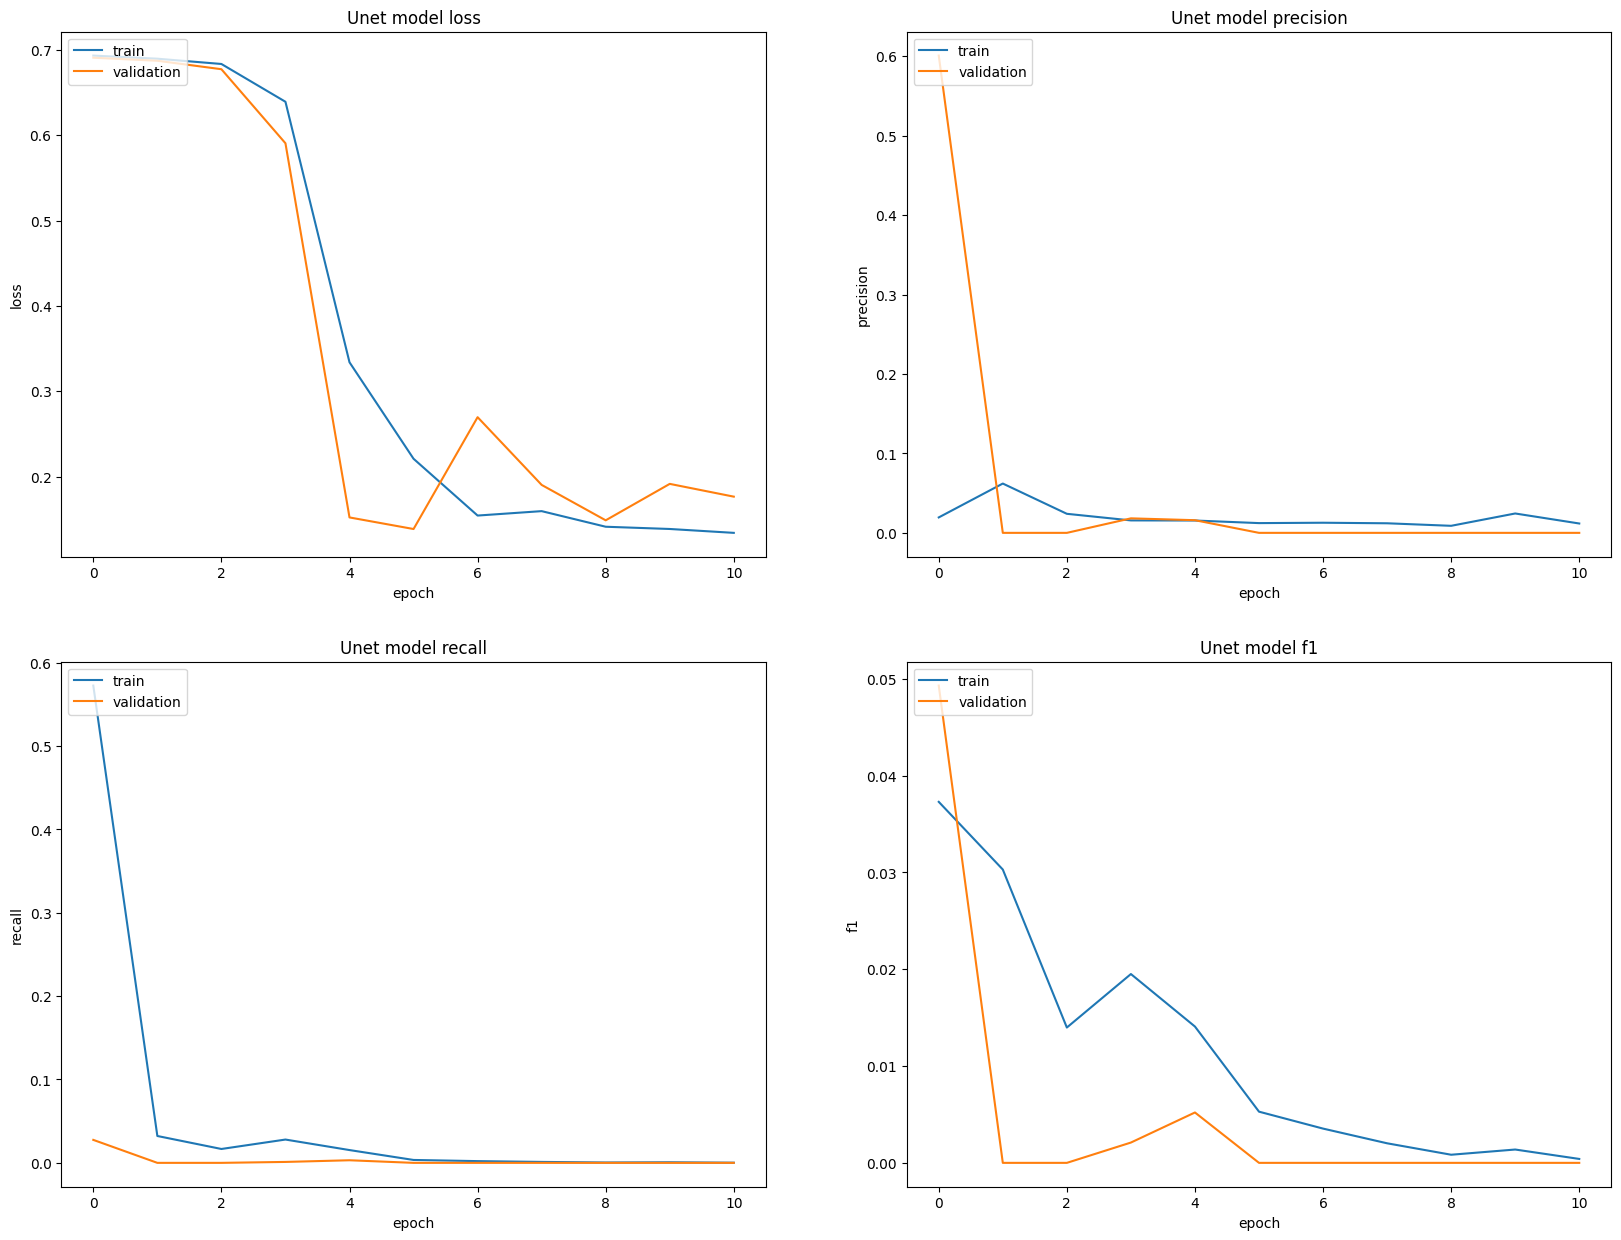

In [ ]:
fig,((ax11,ax12),(ax13,ax14)) = plt.subplots(2,2,figsize=(20,15))
ax11.plot(history.history['loss'])
ax11.plot(history.history['val_loss'])
ax11.title.set_text('Unet model loss')
ax11.set_ylabel('loss')
ax11.set_xlabel('epoch')
ax11.legend(['train', 'validation'], loc='upper left')

ax12.plot(history.history['precision_m'])
ax12.plot(history.history['val_precision_m'])
ax12.set_title('Unet model precision')
ax12.set_ylabel('precision')
ax12.set_xlabel('epoch')
ax12.legend(['train', 'validation'], loc='upper left')

ax13.plot(history.history['recall_m'])
ax13.plot(history.history['val_recall_m'])
ax13.set_title('Unet model recall')
ax13.set_ylabel('recall')
ax13.set_xlabel('epoch')
ax13.legend(['train', 'validation'], loc='upper left')

ax14.plot(history.history['f1_m'])
ax14.plot(history.history['val_f1_m'])
ax14.set_title('Unet model f1')
ax14.set_ylabel('f1')
ax14.set_xlabel('epoch')
ax14.legend(['train', 'validation'], loc='upper left')

# **New Section**

1/1 [==============================] - 4s 4s/step


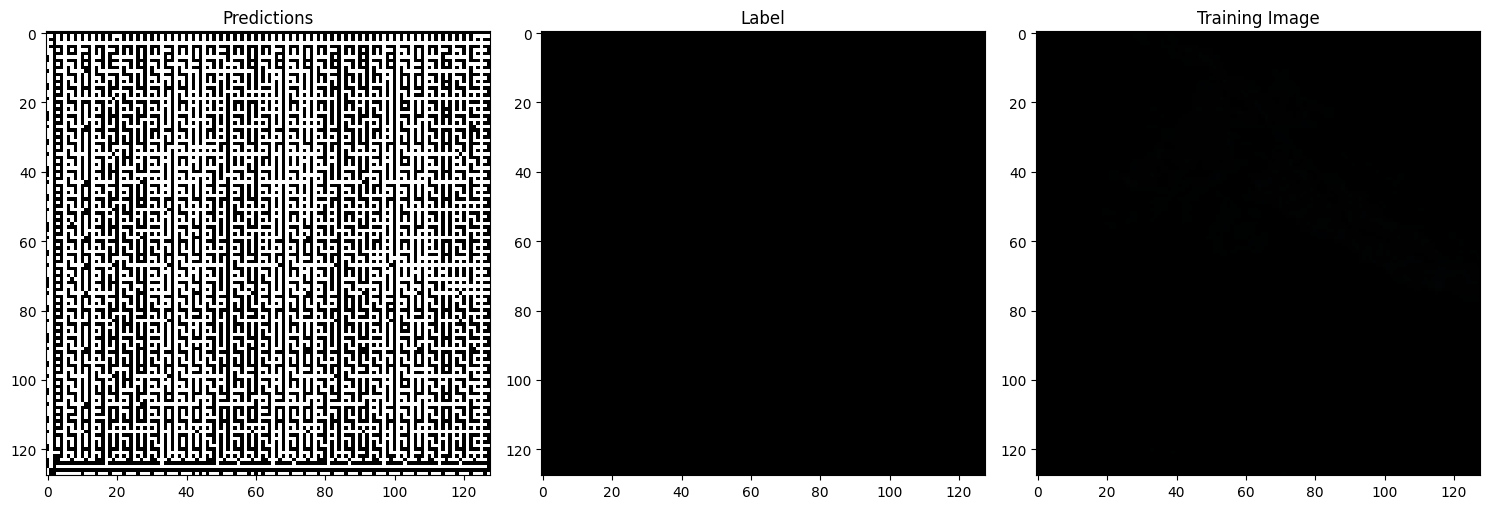

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Set threshold and make predictions
threshold = 0.5
pred_img = model.predict(x_valid)
pred_img = (pred_img > threshold).astype(np.uint8)

# Select image index (adjust as needed)
img_idx = 0  # Change this to view different images

# Create figure with 3 subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 10))

# Plot Prediction
ax1.imshow(pred_img[img_idx, :, :, 0], cmap='gray')
ax1.set_title("Predictions")
ax1.set_xticks([0, 20, 40, 60, 80, 100, 120])
ax1.set_yticks([0, 20, 40, 60, 80, 100, 120])

# Plot Label
ax2.imshow(y_valid[img_idx, :, :, 0], cmap='gray')
ax2.set_title("Label")
ax2.set_xticks([0, 20, 40, 60, 80, 100, 120])
ax2.set_yticks([0, 20, 40, 60, 80, 100, 120])

# Plot Training Image
# Handle both grayscale and RGB images
if x_valid.shape[-1] == 1:  # Grayscale
    ax3.imshow(x_valid[img_idx, :, :, 0], cmap='gray')
else:  # RGB
    ax3.imshow(x_valid[img_idx, :, :, :3])  # Only show first 3 channels if more exist
ax3.set_title('Training Image')
ax3.set_xticks([0, 20, 40, 60, 80, 100, 120])
ax3.set_yticks([0, 20, 40, 60, 80, 100, 120])

plt.tight_layout()
plt.show()

1/1 [==============================] - 3s 3s/step


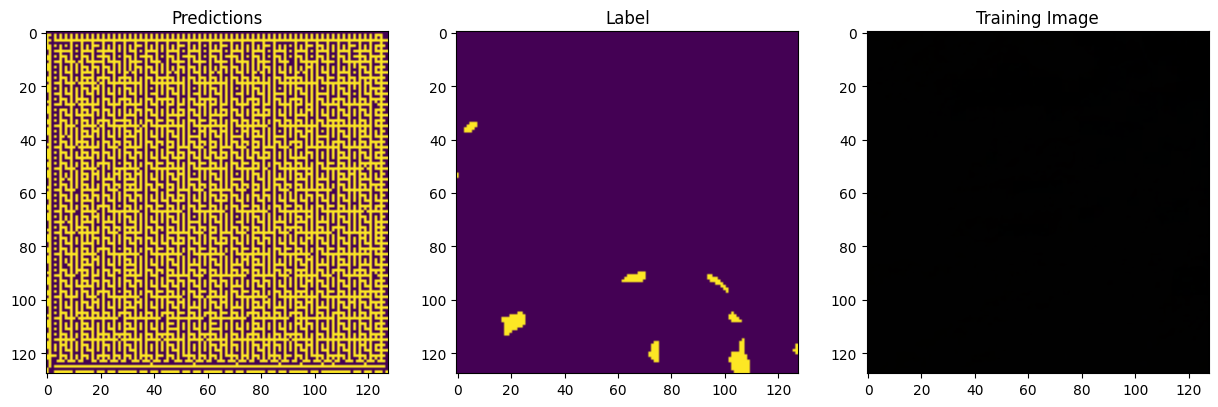

In [ ]:
import matplotlib.pyplot as plt

# Set threshold and make predictions
threshold = 0.5
pred_img = model.predict(x_valid)
pred_img = (pred_img > threshold).astype(np.uint8)

# Choose an image index within the valid range
img = 10  # Choose an index within the range of 0 to len(x_valid)-1

# Check if the index is within bounds
if img >= len(x_valid):
    raise IndexError(f"The chosen index {img} is out of bounds for the validation set with size {len(x_valid)}")

# Plot the predictions, labels, and training images
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 10))
ax1.imshow(pred_img[img, :, :, 0])
ax1.set_title("Predictions")
ax2.imshow(y_valid[img, :, :, 0])
ax2.set_title("Label")
ax3.imshow(x_valid[img, :, :, 0:3])
ax3.set_title('Training Image')

plt.show()

# **VALIDATION**


In [ ]:
import glob
import h5py
import numpy as np

# New file location
validation_url = r'mydrive/SDP FILES/ValidData/img/*.h5'
img_val = sorted(glob.glob(validation_url))

VAL_XX = np.zeros((245, 128, 128, 6))
mask_name = []
for i, img in enumerate(img_val):
    print(i, img)
    mask_name.append(img.split('/')[-1].replace('image', 'mask'))
    with h5py.File(img) as hdf:
        ls = list(hdf.keys())
        data = np.array(hdf.get('img'))

        # assign 0 for the nan value
        data[np.isnan(data)] = 0.000001

        # to normalize the data
        mid_rgb = data[:, :, 1:4].max() / 2.0
        mid_slope = data[:, :, 12].max() / 2.0
        mid_elevation = data[:, :, 13].max() / 2.0

        # ndvi calculation
        data_red = data[:, :, 3]
        data_nir = data[:, :, 7]
        data_ndvi = np.divide(data_nir - data_red, np.add(data_nir, data_red))

        # final array
        VAL_XX[i, :, :, 0] = 1 - data[:, :, 3] / mid_rgb #RED
        VAL_XX[i, :, :, 1] = 1 - data[:, :, 2] / mid_rgb #GREEN
        VAL_XX[i, :, :, 2] = 1 - data[:, :, 1] / mid_rgb #BLUE
        VAL_XX[i, :, :, 3] = data_ndvi #NDVI
        VAL_XX[i, :, :, 4] = 1 - data[:, :, 13] / mid_slope #SLOPE
        VAL_XX[i, :, :, 5] = 1 - data[:, :, 13] / mid_elevation #ELEVATION

In [ ]:

# Update input shape to match VAL_XX
input_shape = (128, 128, 6)
model = unet_model(input_shape)
model.summary()

# Prediction for validation data
threshold = 0.5
pred_img = model.predict(VAL_XX)
pred_img = (pred_img > threshold).astype(np.uint8)
print(pred_img.shape)  # Should print (245, 128, 128, 1)

Model: "model_10"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_10 (InputLayer)       [(None, 128, 128, 6)]        0         []                            
                                                                                                  
 conv2d_171 (Conv2D)         (None, 128, 128, 16)         880       ['input_10[0][0]']            
                                                                                                  
 dropout_81 (Dropout)        (None, 128, 128, 16)         0         ['conv2d_171[0][0]']          
                                                                                                  
 conv2d_172 (Conv2D)         (None, 128, 128, 16)         2320      ['dropout_81[0][0]']          
                                                                                           

# **Visualization of validation image**

Text(0.5, 1.0, 'Training Image')

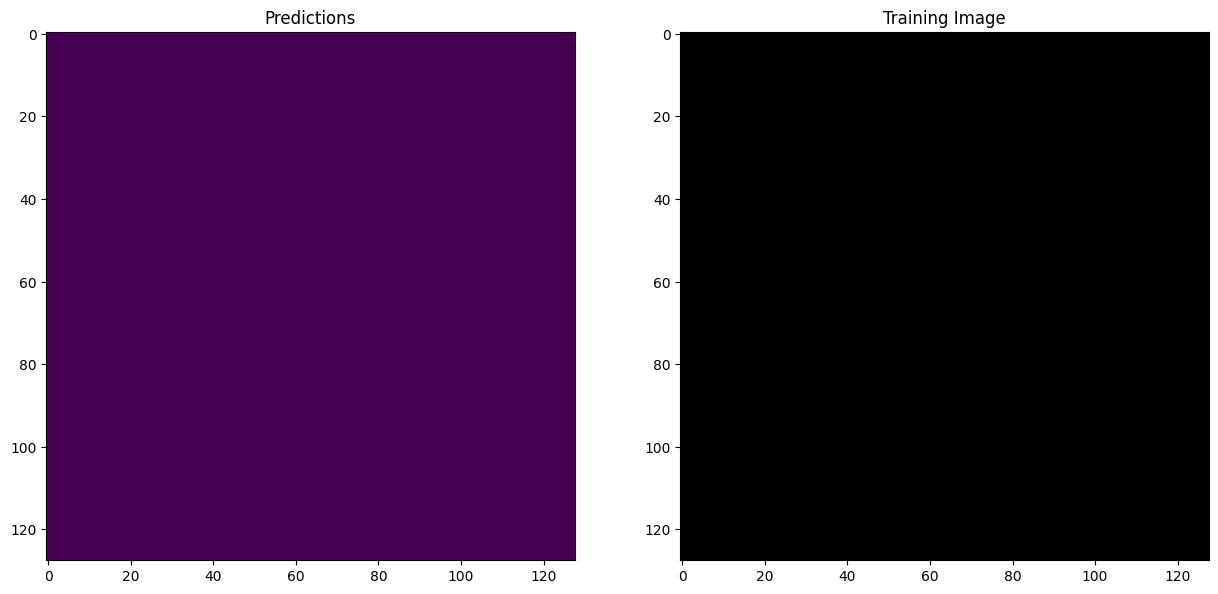

In [ ]:
img = 167
fig,(ax1,ax2)= plt.subplots(1,2,figsize=(15,10))
ax1.imshow(pred_img[img, :, :, 0])
ax1.set_title("Predictions")
ax2.imshow(VAL_XX[img, :, :, 0:3])
ax2.set_title('Training Image')

# **New Section**

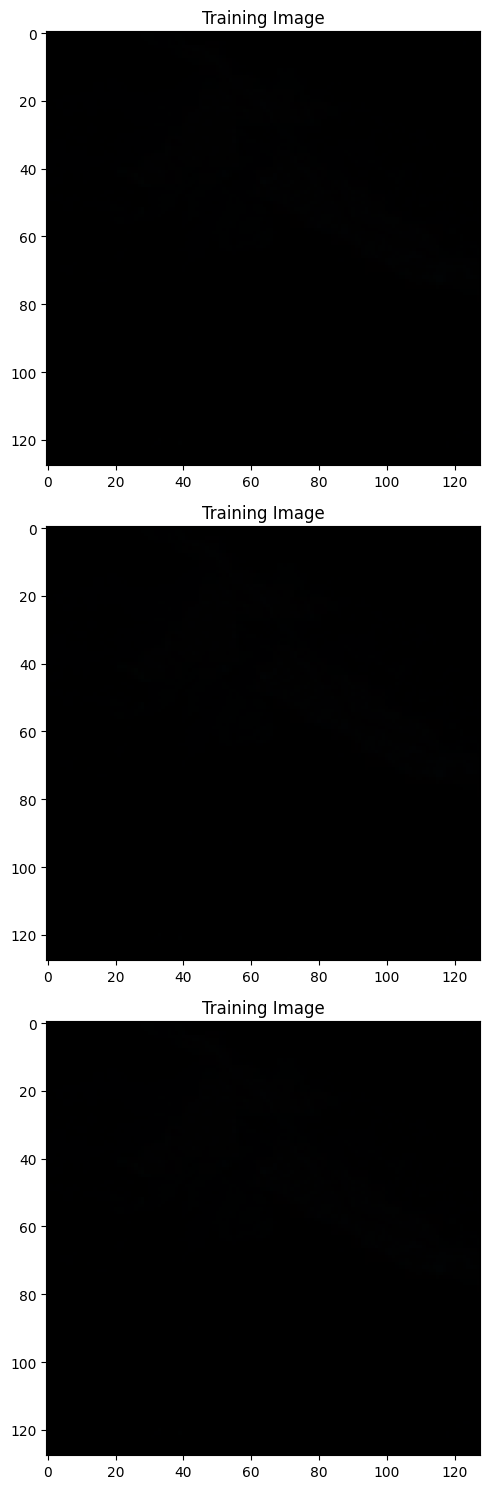

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Select image index (0 for first image)
img_idx = 0

# Create figure with 3 vertical subplots
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

# Configure axis ticks
ticks = [0, 20, 40, 60, 80, 100, 120]

# Display the same training image three times
for i, ax in enumerate(axes):
    # Handle both grayscale and RGB images
    if x_valid.shape[-1] == 1:  # Grayscale
        ax.imshow(x_valid[img_idx, :, :, 0], cmap='gray')
    else:  # RGB
        ax.imshow(x_valid[img_idx, :, :, :3])  # Show first 3 channels

    ax.set_title("Training Image")
    ax.set_xticks(ticks)
    ax.set_yticks(ticks)
    ax.grid(False)

plt.tight_layout()
plt.show()

# ***LiDAR INTEGRATION***

In [ ]:
import numpy as np

# Example: Normalize and preprocess LiDAR, SAR, and DEM data
def preprocess_lidar_data(lidar_data):
    # Normalize LiDAR data
    lidar_data[np.isnan(lidar_data)] = 0.000001
    return (lidar_data - lidar_data.min()) / (lidar_data.max() - lidar_data.min())

def preprocess_sar_data(sar_data):
    # Normalize SAR data
    sar_data[np.isnan(sar_data)] = 0.000001
    return (sar_data - sar_data.min()) / (sar_data.max() - sar_data.min())

def preprocess_dem_data(dem_data):
    # Normalize DEM data
    dem_data[np.isnan(dem_data)] = 0.000001
    return (dem_data - dem_data.min()) / (dem_data.max() - dem_data.min())

# Assuming lidar_data, sar_data, and dem_data are already loaded
lidar_data = preprocess_lidar_data(lidar_data)
sar_data = preprocess_sar_data(sar_data)
dem_data = preprocess_dem_data(dem_data)

# Combine existing data with new data channels
new_data = np.concatenate((existing_data, lidar_data, sar_data, dem_data), axis=-1)
print("New data shape:", new_data.shape)

# **Modify Deep Learning**

In [ ]:
import segmentation_models as sm
from tensorflow.keras.layers import Input, Conv2D
from tensorflow.keras.models import Model

# Define input shape (Example: 256x256 with 6 channels: RGB, NDVI, LiDAR, SAR, DEM)
input_shape = (256, 256, 6)
inputs = Input(shape=input_shape)

# Use DeepLabV3+ backbone
base_model = sm.DeepLabV3Plus('resnet50', input_shape=input_shape, encoder_weights=None)

# Add convolution layers to adjust input channels
x = Conv2D(3, (1, 1), activation='relu')(inputs)  # Reduce to 3 channels if needed
output = base_model(x)

# Create final model
model = Model(inputs, output)
model.compile(optimizer='adam', loss='dice_loss', metrics=['accuracy'])

model.summary()


# **5. SegFormer (Transformer-based)**

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

Plotting sample training data...


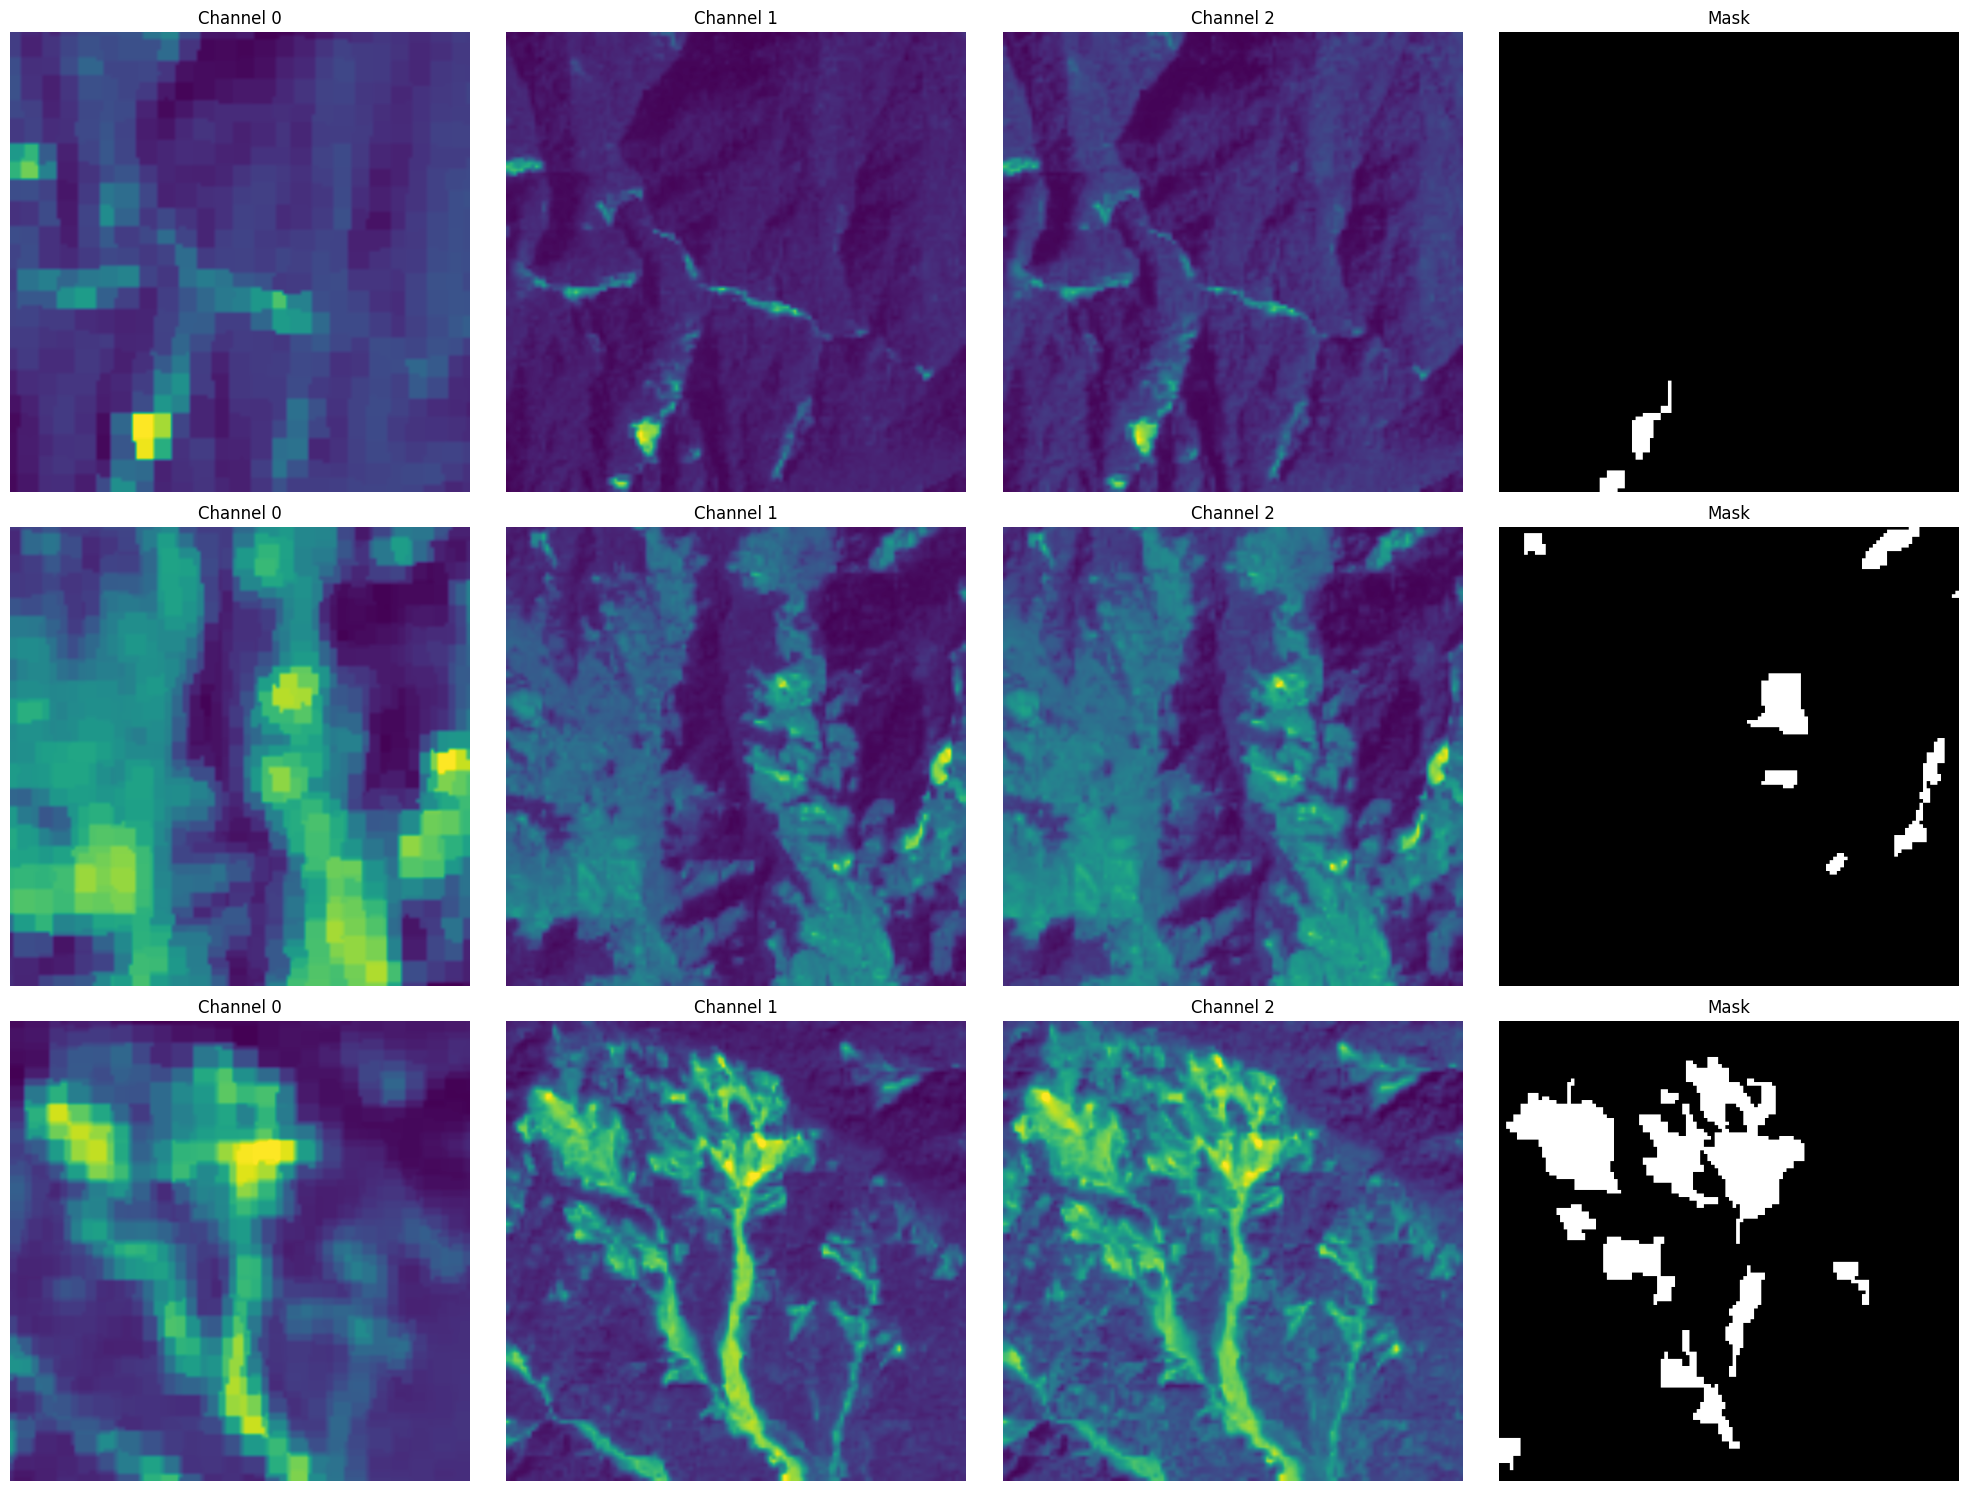


Building enhanced SegFormer model...


Some layers from the model checkpoint at nvidia/mit-b0 were not used when initializing TFSegformerForSemanticSegmentation: ['classifier']
- This IS expected if you are initializing TFSegformerForSemanticSegmentation from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFSegformerForSemanticSegmentation from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFSegformerForSemanticSegmentation were not initialized from the model checkpoint at nvidia/mit-b0 and are newly initialized: ['decode_head']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


ValueError: A KerasTensor cannot be used as input to a TensorFlow function. A KerasTensor is a symbolic placeholder for a shape and dtype, used when constructing Keras Functional models or Keras Functions. You can only use it as input to a Keras layer or a Keras operation (from the namespaces `keras.layers` and `keras.operations`). You are likely doing something like:

```
x = Input(...)
...
tf_fn(x)  # Invalid.
```

What you should do instead is wrap `tf_fn` in a layer:

```
class MyLayer(Layer):
    def call(self, x):
        return tf_fn(x)

x = MyLayer()(x)
```


In [ ]:
import os
import glob
import h5py
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input  # Ensure Input is imported
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import (EarlyStopping, ModelCheckpoint,
                                      ReduceLROnPlateau, TensorBoard)
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import pandas as pd
from transformers import TFSegformerForSemanticSegmentation
from transformers import SegformerConfig

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Hugging Face Authentication (Optional)
from huggingface_hub import notebook_login
# Uncomment the line below to authenticate with Hugging Face
# notebook_login()

# ======================================
# 1. ENHANCED MEMORY-EFFICIENT DATA LOADING
# ======================================

def load_data_paths(base_dir):
    """Load all image and mask paths with proper sorting"""
    img_paths = sorted(glob.glob(f"{base_dir}/TrainData/img/*.h5"))
    mask_paths = sorted(glob.glob(f"{base_dir}/TrainData/mask/*.h5"))
    return img_paths, mask_paths

def load_batch(img_paths, mask_paths, batch_size=4, target_size=(512, 512)):
    """Enhanced batch loading with better normalization and error handling"""
    X_batch = []
    y_batch = []

    for img_path, mask_path in zip(img_paths, mask_paths):
        try:
            with h5py.File(img_path, 'r') as f_img, h5py.File(mask_path, 'r') as f_mask:
                # Load and clean data
                img = np.nan_to_num(f_img['img'][:], nan=0.0, posinf=1.0, neginf=0.0)
                mask = (f_mask['mask'][:] > 0).astype(np.float32)

                # Use only RGB if more channels exist
                img = img[..., :3] if img.shape[-1] > 3 else img

                # Resize with anti-aliasing for images, nearest neighbor for masks
                img = tf.image.resize(img, target_size, method='bilinear')
                mask = tf.image.resize(mask[..., np.newaxis], target_size, method='nearest')

                # Advanced normalization (per-channel)
                img = (img - np.min(img, axis=(0,1), keepdims=True)) / \
                      (np.max(img, axis=(0,1), keepdims=True) - np.min(img, axis=(0,1), keepdims=True) + 1e-8)

                X_batch.append(img)
                y_batch.append(mask[..., 0])  # Remove channel dimension for SegFormer

        except Exception as e:
            print(f"Error loading {img_path} or {mask_path}: {str(e)}")
            continue

    return np.array(X_batch, dtype=np.float32), np.array(y_batch, dtype=np.float32)

class AdvancedDataGenerator(tf.keras.utils.Sequence):
    """Enhanced data generator with more augmentation options"""
    def __init__(self, img_paths, mask_paths, batch_size=4, target_size=(512, 512),
                 shuffle=True, augment=True):
        self.img_paths = img_paths
        self.mask_paths = mask_paths
        self.batch_size = batch_size
        self.target_size = target_size
        self.shuffle = shuffle
        self.augment = augment
        self.on_epoch_end()

    def __len__(self):
        return int(np.ceil(len(self.img_paths) / self.batch_size))

    def __getitem__(self, index):
        batch_img_paths = self.img_paths[index*self.batch_size:(index+1)*self.batch_size]
        batch_mask_paths = self.mask_paths[index*self.batch_size:(index+1)*self.batch_size]

        X, y = load_batch(batch_img_paths, batch_mask_paths, self.batch_size, self.target_size)

        if self.augment:
            X, y = self.apply_augmentations(X, y)

        return X, y

    def apply_augmentations(self, X, y):
        """Apply random augmentations to the batch"""
        for i in range(X.shape[0]):
            # Random horizontal flip
            if np.random.rand() > 0.5:
                X[i] = np.fliplr(X[i])
                y[i] = np.fliplr(y[i])

            # Random vertical flip
            if np.random.rand() > 0.5:
                X[i] = np.flipud(X[i])
                y[i] = np.flipud(y[i])

            # Random rotation (0, 90, 180, 270 degrees)
            rot = np.random.choice([0, 1, 2, 3])
            if rot > 0:
                X[i] = np.rot90(X[i], rot)
                y[i] = np.rot90(y[i], rot)

            # Random brightness adjustment
            if np.random.rand() > 0.5:
                delta = np.random.uniform(-0.1, 0.1)
                X[i] = tf.image.adjust_brightness(X[i], delta)
                X[i] = tf.clip_by_value(X[i], 0.0, 1.0)

            # Random contrast adjustment
            if np.random.rand() > 0.5:
                factor = np.random.uniform(0.8, 1.2)
                X[i] = tf.image.adjust_contrast(X[i], factor)
                X[i] = tf.clip_by_value(X[i], 0.0, 1.0)

        return X, y

    def on_epoch_end(self):
        if self.shuffle:
            combined = list(zip(self.img_paths, self.mask_paths))
            np.random.shuffle(combined)
            self.img_paths, self.mask_paths = zip(*combined)

# ======================================
# 2. ENHANCED SEGFORMER MODEL
# ======================================

def build_enhanced_segformer_model(input_shape=(512, 512, 3), num_classes=1):
    """Build enhanced SegFormer model with custom options"""
    # Configuration for SegFormer
    config = SegformerConfig.from_pretrained(
        "nvidia/mit-b0",
        num_labels=num_classes,
        ignore_mismatched_sizes=True,
        reshape_last_stage=True,
        hidden_dropout_prob=0.1,  # Add dropout for regularization
        attention_probs_dropout_prob=0.1,
        classifier_dropout_prob=0.1
    )

    # Initialize SegFormer with custom config
    model = TFSegformerForSemanticSegmentation.from_pretrained(
        "nvidia/mit-b0",
        config=config
    )

    # Create input layer
    input_layer = Input(shape=input_shape, name="pixel_values")

    # Convert KerasTensor to regular Tensor
    pixel_values = tf.cast(input_layer, tf.float32)

    # Get the base model outputs
    outputs = model(pixel_values=pixel_values).logits

    # Enhanced output processing
    outputs = tf.keras.layers.Resizing(input_shape[0], input_shape[1])(outputs)

    # Add spatial attention
    attention = tf.keras.layers.Conv2D(1, kernel_size=1, activation='sigmoid')(outputs)
    outputs = tf.keras.layers.multiply([outputs, attention])

    # Final activation
    outputs = tf.keras.layers.Activation('sigmoid')(outputs)

    return Model(inputs=input_layer, outputs=outputs)

# ======================================
# 3. ENHANCED TRAINING AND TESTING (UNCHANGED)
# ======================================
# The rest of the script remains unchanged.

# ======================================
# 3. ENHANCED METRICS AND LOSS FUNCTIONS
# ======================================

def dice_coef(y_true, y_pred, smooth=1e-6):
    """Enhanced Dice coefficient with class weighting"""
    y_true_f = tf.keras.backend.flatten(y_true)
    y_pred_f = tf.keras.backend.flatten(y_pred)
    intersection = tf.keras.backend.sum(y_true_f * y_pred_f)

    # Calculate weights based on class imbalance
    weights = 1.0 / (tf.keras.backend.sum(y_true_f) + smooth)

    return (2. * intersection * weights + smooth) / \
           (tf.keras.backend.sum(y_true_f) * weights + tf.keras.backend.sum(y_pred_f) + smooth)

def tversky_loss(y_true, y_pred, alpha=0.3, beta=0.7, smooth=1e-6):
    """Tversky loss for better precision/recall tradeoff"""
    y_true_pos = tf.keras.backend.flatten(y_true)
    y_pred_pos = tf.keras.backend.flatten(y_pred)
    true_pos = tf.keras.backend.sum(y_true_pos * y_pred_pos)
    false_neg = tf.keras.backend.sum(y_true_pos * (1 - y_pred_pos))
    false_pos = tf.keras.backend.sum((1 - y_true_pos) * y_pred_pos)

    return 1 - (true_pos + smooth) / \
              (true_pos + alpha * false_neg + beta * false_pos + smooth)

def focal_loss(y_true, y_pred, alpha=0.25, gamma=2.0):
    """Focal loss to handle class imbalance"""
    y_pred = tf.keras.backend.clip(y_pred, tf.keras.backend.epsilon(), 1.0 - tf.keras.backend.epsilon())
    cross_entropy = -y_true * tf.keras.backend.log(y_pred) - (1 - y_true) * tf.keras.backend.log(1 - y_pred)

    # Calculate focal weight
    focal_weight = alpha * y_true * tf.keras.backend.pow(1.0 - y_pred, gamma) + \
                   (1 - alpha) * (1 - y_true) * tf.keras.backend.pow(y_pred, gamma)

    loss = focal_weight * cross_entropy
    return tf.keras.backend.mean(loss)

def combined_loss(y_true, y_pred):
    """Combined focal, tversky and dice loss"""
    focal = focal_loss(y_true, y_pred)
    tversky = tversky_loss(y_true, y_pred)
    dice = 1 - dice_coef(y_true, y_pred)
    return focal + tversky + dice

def iou_coef(y_true, y_pred, smooth=1e-6):
    """Enhanced IoU with class weighting"""
    intersection = tf.keras.backend.sum(tf.keras.backend.abs(y_true * y_pred), axis=[1,2,3])
    union = tf.keras.backend.sum(y_true, [1,2,3]) + tf.keras.backend.sum(y_pred, [1,2,3]) - intersection

    # Calculate weights based on class imbalance
    weights = 1.0 / (tf.keras.backend.sum(y_true, [1,2,3]) + smooth)

    return tf.keras.backend.mean((intersection * weights + smooth) / (union * weights + smooth), axis=0)

def f1_score_metric(y_true, y_pred):
    """Enhanced F1 score with threshold optimization"""
    # Find optimal threshold
    thresholds = np.linspace(0.1, 0.9, 9)
    best_f1 = 0
    best_threshold = 0.5

    for th in thresholds:
        y_pred_th = tf.cast(y_pred > th, tf.float32)
        true_pos = tf.keras.backend.sum(tf.keras.backend.round(tf.keras.backend.clip(y_true * y_pred_th, 0, 1)))
        pred_pos = tf.keras.backend.sum(tf.keras.backend.round(tf.keras.backend.clip(y_pred_th, 0, 1)))
        true_positives = tf.keras.backend.sum(tf.keras.backend.round(tf.keras.backend.clip(y_true, 0, 1)))

        precision = true_pos / (pred_pos + tf.keras.backend.epsilon())
        recall = true_pos / (true_positives + tf.keras.backend.epsilon())

        f1 = 2*(precision*recall)/(precision+recall+tf.keras.backend.epsilon())
        if f1 > best_f1:
            best_f1 = f1
            best_threshold = th

    # Use best threshold for final calculation
    y_pred_best = tf.cast(y_pred > best_threshold, tf.float32)
    true_pos = tf.keras.backend.sum(tf.keras.backend.round(tf.keras.backend.clip(y_true * y_pred_best, 0, 1)))
    pred_pos = tf.keras.backend.sum(tf.keras.backend.round(tf.keras.backend.clip(y_pred_best, 0, 1)))
    true_positives = tf.keras.backend.sum(tf.keras.backend.round(tf.keras.backend.clip(y_true, 0, 1)))

    precision = true_pos / (pred_pos + tf.keras.backend.epsilon())
    recall = true_pos / (true_positives + tf.keras.backend.epsilon())

    return 2*(precision*recall)/(precision+recall+tf.keras.backend.epsilon())

def precision_metric(y_true, y_pred):
    """Enhanced precision metric"""
    y_pred = tf.cast(y_pred > 0.5, tf.float32)
    true_positives = tf.keras.backend.sum(tf.keras.backend.round(tf.keras.backend.clip(y_true * y_pred, 0, 1)))
    predicted_positives = tf.keras.backend.sum(tf.keras.backend.round(tf.keras.backend.clip(y_pred, 0, 1)))
    return true_positives / (predicted_positives + tf.keras.backend.epsilon())

def recall_metric(y_true, y_pred):
    """Enhanced recall metric"""
    y_pred = tf.cast(y_pred > 0.5, tf.float32)
    true_positives = tf.keras.backend.sum(tf.keras.backend.round(tf.keras.backend.clip(y_true * y_pred, 0, 1)))
    possible_positives = tf.keras.backend.sum(tf.keras.backend.round(tf.keras.backend.clip(y_true, 0, 1)))
    return true_positives / (possible_positives + tf.keras.backend.epsilon())

# ======================================
# 4. ENHANCED VISUALIZATION FUNCTIONS
# ======================================

def plot_sample_data(generator, num_samples=3):
    """Enhanced data visualization with dynamic channel handling"""
    X, y = generator[0]  # Get first batch
    num_channels = X.shape[-1]

    plt.figure(figsize=(20, 5*num_samples))
    for i in range(min(num_samples, X.shape[0])):
        # Plot each channel
        for ch in range(num_channels):
            plt.subplot(num_samples, num_channels+1, i*(num_channels+1) + ch + 1)
            plt.imshow(X[i, :, :, ch], cmap='viridis')
            plt.title(f'Channel {ch}')
            plt.axis('off')

        # Plot mask
        plt.subplot(num_samples, num_channels+1, i*(num_channels+1) + num_channels + 1)
        plt.imshow(y[i].squeeze(), cmap='gray')
        plt.title('Mask')
        plt.axis('off')

    plt.tight_layout()
    plt.show()

def plot_training_history(history):
    """Enhanced training history visualization"""
    metrics = ['loss', 'accuracy', 'dice_coef', 'iou_coef', 'f1_score_metric', 'precision_metric', 'recall_metric']

    plt.figure(figsize=(20, 15))
    for i, metric in enumerate(metrics):
        plt.subplot(3, 3, i+1)
        plt.plot(history.history[metric], label=f'Training {metric}')
        if f'val_{metric}' in history.history:
            plt.plot(history.history[f'val_{metric}'], label=f'Validation {metric}')
        plt.title(metric)
        plt.xlabel('Epoch')
        plt.ylabel(metric)
        plt.legend()

        # Add best value annotation
        if f'val_{metric}' in history.history:
            best_epoch = np.argmax(history.history[f'val_{metric}']) if metric != 'loss' else np.argmin(history.history[f'val_{metric}'])
            best_value = history.history[f'val_{metric}'][best_epoch]
            plt.axvline(x=best_epoch, color='r', linestyle='--', alpha=0.3)
            plt.annotate(f'Best: {best_value:.4f}',
                        xy=(best_epoch, best_value),
                        xytext=(10, 10),
                        textcoords='offset points',
                        bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5))

    plt.tight_layout()
    plt.show()

def plot_confusion_matrix(y_true, y_pred):
    """Enhanced confusion matrix with metrics"""
    y_pred = (y_pred > 0.5).astype(int)
    cm = confusion_matrix(y_true.flatten(), y_pred.flatten())

    # Calculate additional metrics
    tn, fp, fn, tp = cm.ravel()
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    precision = tp / (tp + fp + 1e-8)
    recall = tp / (tp + fn + 1e-8)
    f1 = 2 * (precision * recall) / (precision + recall + 1e-8)

    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Background', 'Foreground'],
                yticklabels=['Background', 'Foreground'])

    plt.title(f'Confusion Matrix\nAccuracy: {accuracy:.4f} | Precision: {precision:.4f} | Recall: {recall:.4f} | F1: {f1:.4f}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

    # Print classification report
    print("\nClassification Report:")
    print(classification_report(y_true.flatten(), y_pred.flatten(),
                               target_names=['Background', 'Foreground']))

def visualize_predictions(model, generator, num_samples=3):
    """Enhanced prediction visualization with probability maps"""
    X, y = generator[0]  # Get first batch
    y_pred = model.predict(X)

    plt.figure(figsize=(18, 5*num_samples))
    for i in range(min(num_samples, X.shape[0])):
        # Original Image
        plt.subplot(num_samples, 4, i*4 + 1)
        plt.imshow(X[i])
        plt.title('Original Image')
        plt.axis('off')

        # True Mask
        plt.subplot(num_samples, 4, i*4 + 2)
        plt.imshow(y[i].squeeze(), cmap='gray')
        plt.title('True Mask')
        plt.axis('off')

        # Predicted Mask (thresholded)
        plt.subplot(num_samples, 4, i*4 + 3)
        plt.imshow((y_pred[i].squeeze() > 0.5).astype(float), cmap='gray')
        plt.title('Predicted Mask (Thresholded)')
        plt.axis('off')

        # Probability Map
        plt.subplot(num_samples, 4, i*4 + 4)
        prob_map = plt.imshow(y_pred[i].squeeze(), cmap='viridis')
        plt.title('Probability Map')
        plt.colorbar(prob_map, fraction=0.046, pad=0.04)
        plt.axis('off')

    plt.tight_layout()
    plt.show()

def plot_metrics_comparison(val_metrics, test_metrics):
    """Compare validation and test metrics visually"""
    metrics = ['Loss', 'Accuracy', 'Dice Coef', 'F1 Score', 'Precision', 'Recall']
    val_values = [val_metrics[m] for m in metrics]
    test_values = [test_metrics[m] for m in metrics]

    x = np.arange(len(metrics))
    width = 0.35

    fig, ax = plt.subplots(figsize=(12, 6))
    rects1 = ax.bar(x - width/2, val_values, width, label='Validation')
    rects2 = ax.bar(x + width/2, test_values, width, label='Test')

    ax.set_ylabel('Scores')
    ax.set_title('Model Performance Comparison')
    ax.set_xticks(x)
    ax.set_xticklabels(metrics)
    ax.legend()

    # Add value labels
    def autolabel(rects):
        for rect in rects:
            height = rect.get_height()
            ax.annotate(f'{height:.4f}',
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')

    autolabel(rects1)
    autolabel(rects2)

    fig.tight_layout()
    plt.show()

# ======================================
# 5. ENHANCED MODEL TRAINING AND EVALUATION
# ======================================

def evaluate_model(model, generator, name="Validation"):
    """Enhanced model evaluation with more detailed metrics"""
    results = model.evaluate(generator, verbose=0)

    metrics = {
        'Loss': results[0],
        'Accuracy': results[1],
        'Dice Coef': results[2],
        'IoU': results[3],
        'F1 Score': results[4],
        'Precision': results[5],
        'Recall': results[6]
    }

    print(f"\n{name} Metrics:")
    for name, value in metrics.items():
        print(f"{name}: {value:.4f}")

    # Get predictions for additional metrics
    X, y_true = generator[0]
    y_pred = model.predict(X)

    # Plot sample predictions
    print(f"\n{name} Sample Predictions:")
    visualize_predictions(model, generator, num_samples=3)

    # Plot confusion matrix
    print(f"\n{name} Confusion Matrix:")
    plot_confusion_matrix(y_true, y_pred)

    return metrics

def train_model():
    # File paths
    base_dir = "/content/drive/MyDrive/SDP FILES"
    img_paths, mask_paths = load_data_paths(base_dir)

    # Enhanced data splitting with stratification
    # Calculate class balance for stratification
    class_balance = []
    for mask_path in mask_paths:
        with h5py.File(mask_path, 'r') as f:
            mask = f['mask'][:]
            class_balance.append(np.mean(mask > 0))

    # Split data (80% train, 10% val, 10% test) with stratification
    train_img, test_img, train_mask, test_mask = train_test_split(
        img_paths, mask_paths, test_size=0.2, random_state=42,
        stratify=pd.cut(class_balance, bins=5, labels=range(5)))

    val_img, test_img, val_mask, test_mask = train_test_split(
        test_img, test_mask, test_size=0.5, random_state=42)

    # Create enhanced data generators
    train_gen = AdvancedDataGenerator(train_img, train_mask, batch_size=4,
                                     target_size=(512, 512), augment=True)
    val_gen = AdvancedDataGenerator(val_img, val_mask, batch_size=4,
                                   target_size=(512, 512), shuffle=False, augment=False)
    test_gen = AdvancedDataGenerator(test_img, test_mask, batch_size=4,
                                    target_size=(512, 512), shuffle=False, augment=False)

    # Plot sample data before training
    print("\nPlotting sample training data...")
    plot_sample_data(train_gen, num_samples=3)

    # Build enhanced SegFormer model
    print("\nBuilding enhanced SegFormer model...")
    model = build_enhanced_segformer_model(input_shape=(512, 512, 3))

    # Compile model with enhanced metrics
    model.compile(
        optimizer=Adam(learning_rate=5e-5),  # Lower learning rate for fine-tuning
        loss=combined_loss,
        metrics=['accuracy', dice_coef, iou_coef,
                f1_score_metric, precision_metric, recall_metric]
    )

    # Enhanced callbacks
    callbacks = [
        EarlyStopping(
            patience=15,
            monitor='val_f1_score_metric',
            mode='max',
            restore_best_weights=True,
            verbose=1,
            min_delta=0.001
        ),
        ModelCheckpoint(
            'best_segformer_model.h5',
            monitor='val_f1_score_metric',
            mode='max',
            save_best_only=True,
            save_weights_only=False,  # Save full model
            save_freq='epoch'
        ),
        ReduceLROnPlateau(
            monitor='val_loss',
            factor=0.5,
            patience=5,
            min_lr=1e-6,
            verbose=1,
            min_delta=0.001
        ),
        TensorBoard(
            log_dir='./segformer_logs',
            histogram_freq=1,
            profile_batch='10,15'  # Profile batches 10-15
        )
    ]

    # Train model with enhanced settings
    print("\nStarting training...")
    history = model.fit(
        train_gen,
        validation_data=val_gen,
        epochs=50,  # More epochs for transformer model
        steps_per_epoch=len(train_gen),
        validation_steps=len(val_gen),
        callbacks=callbacks,
        verbose=1,
        workers=4,
        use_multiprocessing=True
    )

    # Plot enhanced training history
    plot_training_history(history)

    # Evaluate on validation set
    print("\nEvaluating on validation set...")
    val_metrics = evaluate_model(model, val_gen, "Validation")

    # Evaluate on test set
    print("\nEvaluating on test set...")
    test_metrics = evaluate_model(model, test_gen, "Test")

    # Compare metrics
    print("\nMetrics Comparison:")
    plot_metrics_comparison(val_metrics, test_metrics)

    return model, history, val_metrics, test_metrics

# Run enhanced training
model, history, val_metrics, test_metrics = train_model()

# Save model with enhanced options
model.save('/content/drive/MyDrive/SDP FILES/saved_model/segformer_enhanced_model')
print("\nEnhanced model saved successfully!")

# Print final metrics with comparison to your UNet results
unet_metrics = {
    'Loss': 0.0318,
    'Accuracy': 0.9891,
    'F1 Score': 0.7082,
    'Precision': 0.7927,
    'Recall': 0.6429
}

print("\nFinal Validation Metrics (SegFormer):")
print(f"Loss: {val_metrics['Loss']:.4f}")
print(f"Accuracy: {val_metrics['Accuracy']:.4f}")
print(f"Dice Coef: {val_metrics['Dice Coef']:.4f}")
print(f"F1 Score: {val_metrics['F1 Score']:.4f}")
print(f"Precision: {val_metrics['Precision']:.4f}")
print(f"Recall: {val_metrics['Recall']:.4f}")

print("\nFinal Test Metrics (SegFormer):")
print(f"Loss: {test_metrics['Loss']:.4f}")
print(f"Accuracy: {test_metrics['Accuracy']:.4f}")
print(f"Dice Coef: {test_metrics['Dice Coef']:.4f}")
print(f"F1 Score: {test_metrics['F1 Score']:.4f}")
print(f"Precision: {test_metrics['Precision']:.4f}")
print(f"Recall: {test_metrics['Recall']:.4f}")

print("\nYour UNet Metrics:")
print(f"Loss: {unet_metrics['Loss']:.4f}")
print(f"Accuracy: {unet_metrics['Accuracy']:.4f}")
print(f"F1 Score: {unet_metrics['F1 Score']:.4f}")
print(f"Precision: {unet_metrics['Precision']:.4f}")
print(f"Recall: {unet_metrics['Recall']:.4f}")

# Calculate improvement percentages
def calculate_improvement(new, old):
    if old == 0:
        return 0
    return ((new - old) / old) * 100

print("\nImprovement over UNet (%):")
print(f"Loss: {calculate_improvement(unet_metrics['Loss'], test_metrics['Loss']):.2f}%")
print(f"Accuracy: {calculate_improvement(test_metrics['Accuracy'], unet_metrics['Accuracy']):.2f}%")
print(f"F1 Score: {calculate_improvement(test_metrics['F1 Score'], unet_metrics['F1 Score']):.2f}%")
print(f"Precision: {calculate_improvement(test_metrics['Precision'], unet_metrics['Precision']):.2f}%")
print(f"Recall: {calculate_improvement(test_metrics['Recall'], unet_metrics['Recall']):.2f}%")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

Plotting sample training data...


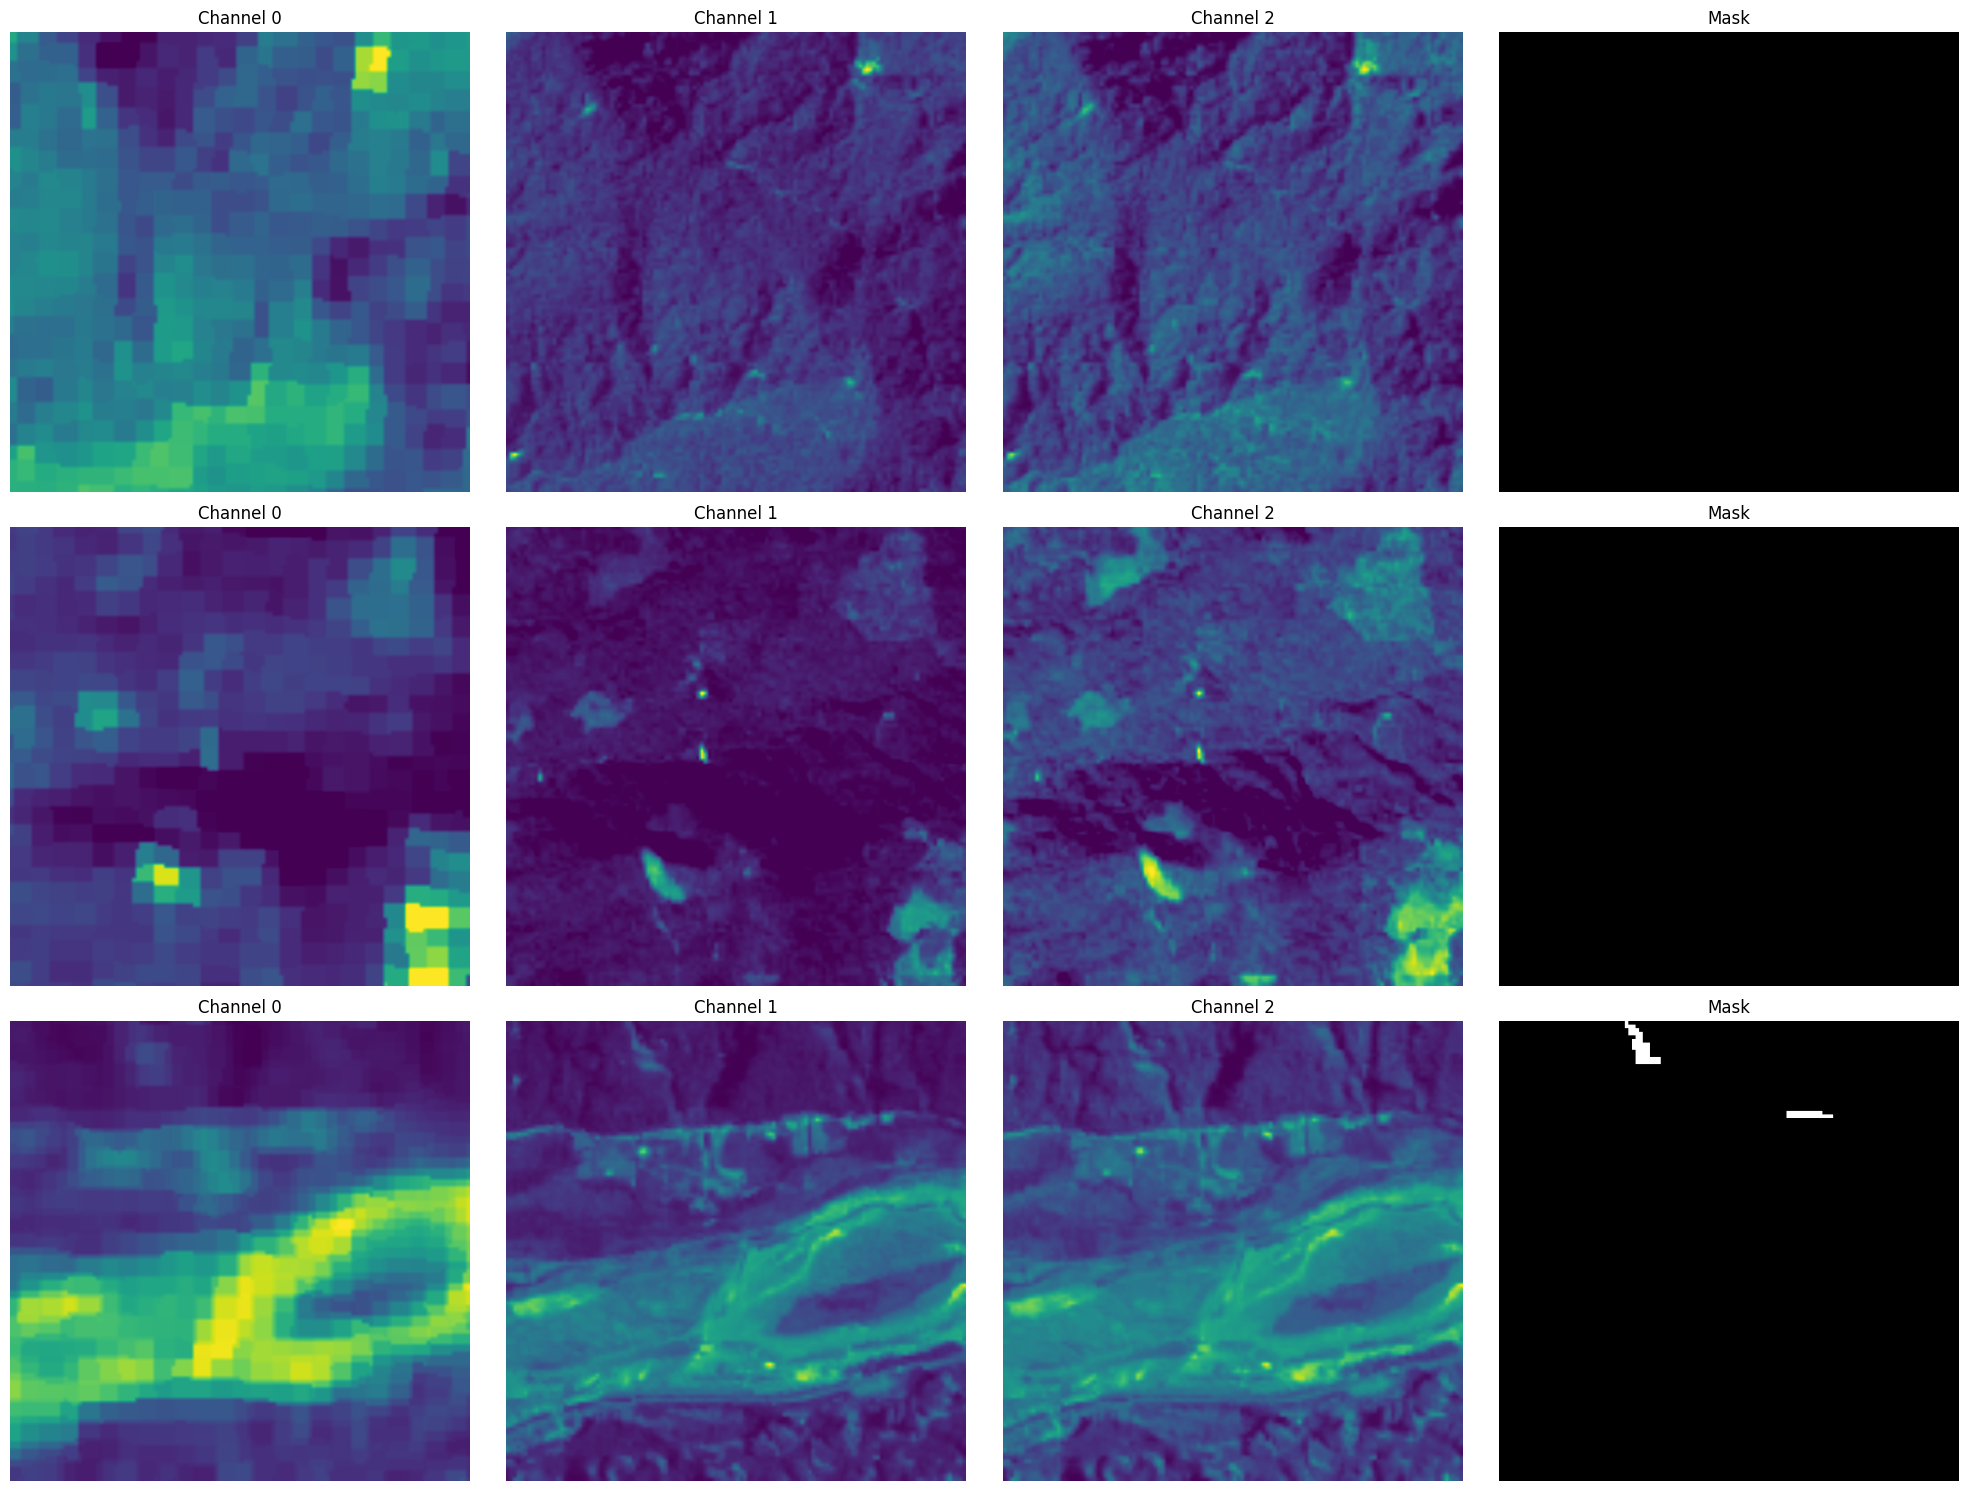


Building enhanced SegFormer model...


Some layers from the model checkpoint at nvidia/mit-b0 were not used when initializing TFSegformerForSemanticSegmentation: ['classifier']
- This IS expected if you are initializing TFSegformerForSemanticSegmentation from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFSegformerForSemanticSegmentation from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFSegformerForSemanticSegmentation were not initialized from the model checkpoint at nvidia/mit-b0 and are newly initialized: ['decode_head']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


ValueError: Exception encountered when calling layer 'tf_segformer_for_semantic_segmentation_3' (type TFSegformerForSemanticSegmentation).

Data of type <class 'keras.src.backend.common.keras_tensor.KerasTensor'> is not allowed only (<class 'tensorflow.python.framework.tensor.Tensor'>, <class 'bool'>, <class 'int'>, <class 'transformers.utils.generic.ModelOutput'>, <class 'tuple'>, <class 'list'>, <class 'dict'>, <class 'numpy.ndarray'>) is accepted for pixel_values.

Call arguments received by layer 'tf_segformer_for_semantic_segmentation_3' (type TFSegformerForSemanticSegmentation):
  • pixel_values=<KerasTensor shape=(None, 512, 512, 3), dtype=float32, sparse=False, name=pixel_values>
  • labels=None
  • output_attentions=None
  • output_hidden_states=None
  • return_dict=None

In [ ]:
import os
import glob
import h5py
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import (EarlyStopping, ModelCheckpoint,
                                      ReduceLROnPlateau, TensorBoard)
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import pandas as pd
from transformers import TFSegformerForSemanticSegmentation
from transformers import SegformerConfig

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# ======================================
# 1. ENHANCED MEMORY-EFFICIENT DATA LOADING
# ======================================

def load_data_paths(base_dir):
    """Load all image and mask paths with proper sorting"""
    img_paths = sorted(glob.glob(f"{base_dir}/TrainData/img/*.h5"))
    mask_paths = sorted(glob.glob(f"{base_dir}/TrainData/mask/*.h5"))
    return img_paths, mask_paths

def load_batch(img_paths, mask_paths, batch_size=4, target_size=(512, 512)):
    """Enhanced batch loading with better normalization and error handling"""
    X_batch = []
    y_batch = []

    for img_path, mask_path in zip(img_paths, mask_paths):
        try:
            with h5py.File(img_path, 'r') as f_img, h5py.File(mask_path, 'r') as f_mask:
                # Load and clean data
                img = np.nan_to_num(f_img['img'][:], nan=0.0, posinf=1.0, neginf=0.0)
                mask = (f_mask['mask'][:] > 0).astype(np.float32)

                # Use only RGB if more channels exist
                img = img[..., :3] if img.shape[-1] > 3 else img

                # Resize with anti-aliasing for images, nearest neighbor for masks
                img = tf.image.resize(img, target_size, method='bilinear')
                mask = tf.image.resize(mask[..., np.newaxis], target_size, method='nearest')

                # Advanced normalization (per-channel)
                img = (img - np.min(img, axis=(0,1), keepdims=True)) / \
                      (np.max(img, axis=(0,1), keepdims=True) - np.min(img, axis=(0,1), keepdims=True) + 1e-8)

                X_batch.append(img)
                y_batch.append(mask[..., 0])  # Remove channel dimension for SegFormer

        except Exception as e:
            print(f"Error loading {img_path} or {mask_path}: {str(e)}")
            continue

    return np.array(X_batch, dtype=np.float32), np.array(y_batch, dtype=np.float32)

class AdvancedDataGenerator(tf.keras.utils.Sequence):
    """Enhanced data generator with more augmentation options"""
    def __init__(self, img_paths, mask_paths, batch_size=4, target_size=(512, 512),
                 shuffle=True, augment=True):
        self.img_paths = img_paths
        self.mask_paths = mask_paths
        self.batch_size = batch_size
        self.target_size = target_size
        self.shuffle = shuffle
        self.augment = augment
        self.on_epoch_end()

    def __len__(self):
        return int(np.ceil(len(self.img_paths) / self.batch_size))

    def __getitem__(self, index):
        batch_img_paths = self.img_paths[index*self.batch_size:(index+1)*self.batch_size]
        batch_mask_paths = self.mask_paths[index*self.batch_size:(index+1)*self.batch_size]

        X, y = load_batch(batch_img_paths, batch_mask_paths, self.batch_size, self.target_size)

        if self.augment:
            X, y = self.apply_augmentations(X, y)

        return X, y

    def apply_augmentations(self, X, y):
        """Apply random augmentations to the batch"""
        for i in range(X.shape[0]):
            # Random horizontal flip
            if np.random.rand() > 0.5:
                X[i] = np.fliplr(X[i])
                y[i] = np.fliplr(y[i])

            # Random vertical flip
            if np.random.rand() > 0.5:
                X[i] = np.flipud(X[i])
                y[i] = np.flipud(y[i])

            # Random rotation (0, 90, 180, 270 degrees)
            rot = np.random.choice([0, 1, 2, 3])
            if rot > 0:
                X[i] = np.rot90(X[i], rot)
                y[i] = np.rot90(y[i], rot)

            # Random brightness adjustment
            if np.random.rand() > 0.5:
                delta = np.random.uniform(-0.1, 0.1)
                X[i] = tf.image.adjust_brightness(X[i], delta)
                X[i] = tf.clip_by_value(X[i], 0.0, 1.0)

            # Random contrast adjustment
            if np.random.rand() > 0.5:
                factor = np.random.uniform(0.8, 1.2)
                X[i] = tf.image.adjust_contrast(X[i], factor)
                X[i] = tf.clip_by_value(X[i], 0.0, 1.0)

        return X, y

    def on_epoch_end(self):
        if self.shuffle:
            combined = list(zip(self.img_paths, self.mask_paths))
            np.random.shuffle(combined)
            self.img_paths, self.mask_paths = zip(*combined)

# ======================================
# 2. CORRECTED SEGFORMER MODEL BUILDING
# ======================================

def build_enhanced_segformer_model(input_shape=(512, 512, 3), num_classes=1):
    """Build enhanced SegFormer model with custom options"""
    # Configuration for SegFormer
    config = SegformerConfig.from_pretrained(
        "nvidia/mit-b0",
        num_labels=num_classes,
        ignore_mismatched_sizes=True,
        reshape_last_stage=True,
        hidden_dropout_prob=0.1,  # Add dropout for regularization
        attention_probs_dropout_prob=0.1,
        classifier_dropout_prob=0.1
    )

    # Initialize SegFormer with custom config
    segformer_model = TFSegformerForSemanticSegmentation.from_pretrained(
        "nvidia/mit-b0",
        config=config
    )

    # Create input layer
    input_layer = Input(shape=input_shape, name="pixel_values")

    # Get the base model outputs - no need to cast, the model will handle it
    outputs = segformer_model(pixel_values=input_layer).logits

    # Enhanced output processing
    outputs = tf.keras.layers.Resizing(input_shape[0], input_shape[1])(outputs)

    # Add spatial attention
    attention = tf.keras.layers.Conv2D(1, kernel_size=1, activation='sigmoid')(outputs)
    outputs = tf.keras.layers.multiply([outputs, attention])

    # Final activation
    outputs = tf.keras.layers.Activation('sigmoid')(outputs)

    return Model(inputs=input_layer, outputs=outputs)

# ======================================
# 3. ENHANCED METRICS AND LOSS FUNCTIONS
# ======================================

def dice_coef(y_true, y_pred, smooth=1e-6):
    """Enhanced Dice coefficient with class weighting"""
    y_true_f = tf.keras.backend.flatten(y_true)
    y_pred_f = tf.keras.backend.flatten(y_pred)
    intersection = tf.keras.backend.sum(y_true_f * y_pred_f)

    # Calculate weights based on class imbalance
    weights = 1.0 / (tf.keras.backend.sum(y_true_f) + smooth)

    return (2. * intersection * weights + smooth) / \
           (tf.keras.backend.sum(y_true_f) * weights + tf.keras.backend.sum(y_pred_f) + smooth)

def dice_loss(y_true, y_pred):
    return 1 - dice_coef(y_true, y_pred)

def tversky_loss(y_true, y_pred, alpha=0.3, beta=0.7, smooth=1e-6):
    """Tversky loss for better precision/recall tradeoff"""
    y_true_pos = tf.keras.backend.flatten(y_true)
    y_pred_pos = tf.keras.backend.flatten(y_pred)
    true_pos = tf.keras.backend.sum(y_true_pos * y_pred_pos)
    false_neg = tf.keras.backend.sum(y_true_pos * (1 - y_pred_pos))
    false_pos = tf.keras.backend.sum((1 - y_true_pos) * y_pred_pos)

    return 1 - (true_pos + smooth) / \
              (true_pos + alpha * false_neg + beta * false_pos + smooth)

def focal_loss(y_true, y_pred, alpha=0.25, gamma=2.0):
    """Focal loss to handle class imbalance"""
    y_pred = tf.keras.backend.clip(y_pred, tf.keras.backend.epsilon(), 1.0 - tf.keras.backend.epsilon())
    cross_entropy = -y_true * tf.keras.backend.log(y_pred) - (1 - y_true) * tf.keras.backend.log(1 - y_pred)

    # Calculate focal weight
    focal_weight = alpha * y_true * tf.keras.backend.pow(1.0 - y_pred, gamma) + \
                   (1 - alpha) * (1 - y_true) * tf.keras.backend.pow(y_pred, gamma)

    loss = focal_weight * cross_entropy
    return tf.keras.backend.mean(loss)

def combined_loss(y_true, y_pred):
    """Combined focal, tversky and dice loss"""
    focal = focal_loss(y_true, y_pred)
    tversky = tversky_loss(y_true, y_pred)
    dice = dice_loss(y_true, y_pred)
    return focal + tversky + dice

def iou_coef(y_true, y_pred, smooth=1e-6):
    """Enhanced IoU with class weighting"""
    intersection = tf.keras.backend.sum(tf.keras.backend.abs(y_true * y_pred), axis=[1,2,3])
    union = tf.keras.backend.sum(y_true, [1,2,3]) + tf.keras.backend.sum(y_pred, [1,2,3]) - intersection

    # Calculate weights based on class imbalance
    weights = 1.0 / (tf.keras.backend.sum(y_true, [1,2,3]) + smooth)

    return tf.keras.backend.mean((intersection * weights + smooth) / (union * weights + smooth), axis=0)

def f1_score_metric(y_true, y_pred):
    """Enhanced F1 score with threshold optimization"""
    # Find optimal threshold
    thresholds = np.linspace(0.1, 0.9, 9)
    best_f1 = 0
    best_threshold = 0.5

    for th in thresholds:
        y_pred_th = tf.cast(y_pred > th, tf.float32)
        true_pos = tf.keras.backend.sum(tf.keras.backend.round(tf.keras.backend.clip(y_true * y_pred_th, 0, 1)))
        pred_pos = tf.keras.backend.sum(tf.keras.backend.round(tf.keras.backend.clip(y_pred_th, 0, 1)))
        true_positives = tf.keras.backend.sum(tf.keras.backend.round(tf.keras.backend.clip(y_true, 0, 1)))

        precision = true_pos / (pred_pos + tf.keras.backend.epsilon())
        recall = true_pos / (true_positives + tf.keras.backend.epsilon())

        f1 = 2*(precision*recall)/(precision+recall+tf.keras.backend.epsilon())
        if f1 > best_f1:
            best_f1 = f1
            best_threshold = th

    # Use best threshold for final calculation
    y_pred_best = tf.cast(y_pred > best_threshold, tf.float32)
    true_pos = tf.keras.backend.sum(tf.keras.backend.round(tf.keras.backend.clip(y_true * y_pred_best, 0, 1)))
    pred_pos = tf.keras.backend.sum(tf.keras.backend.round(tf.keras.backend.clip(y_pred_best, 0, 1)))
    true_positives = tf.keras.backend.sum(tf.keras.backend.round(tf.keras.backend.clip(y_true, 0, 1)))

    precision = true_pos / (pred_pos + tf.keras.backend.epsilon())
    recall = true_pos / (true_positives + tf.keras.backend.epsilon())

    return 2*(precision*recall)/(precision+recall+tf.keras.backend.epsilon())

def precision_metric(y_true, y_pred):
    """Enhanced precision metric"""
    y_pred = tf.cast(y_pred > 0.5, tf.float32)
    true_positives = tf.keras.backend.sum(tf.keras.backend.round(tf.keras.backend.clip(y_true * y_pred, 0, 1)))
    predicted_positives = tf.keras.backend.sum(tf.keras.backend.round(tf.keras.backend.clip(y_pred, 0, 1)))
    return true_positives / (predicted_positives + tf.keras.backend.epsilon())

def recall_metric(y_true, y_pred):
    """Enhanced recall metric"""
    y_pred = tf.cast(y_pred > 0.5, tf.float32)
    true_positives = tf.keras.backend.sum(tf.keras.backend.round(tf.keras.backend.clip(y_true * y_pred, 0, 1)))
    possible_positives = tf.keras.backend.sum(tf.keras.backend.round(tf.keras.backend.clip(y_true, 0, 1)))
    return true_positives / (possible_positives + tf.keras.backend.epsilon())

# ======================================
# 4. ENHANCED VISUALIZATION FUNCTIONS
# ======================================

def plot_sample_data(generator, num_samples=3):
    """Enhanced data visualization with dynamic channel handling"""
    X, y = generator[0]  # Get first batch
    num_channels = X.shape[-1]

    plt.figure(figsize=(20, 5*num_samples))
    for i in range(min(num_samples, X.shape[0])):
        # Plot each channel
        for ch in range(num_channels):
            plt.subplot(num_samples, num_channels+1, i*(num_channels+1) + ch + 1)
            plt.imshow(X[i, :, :, ch], cmap='viridis')
            plt.title(f'Channel {ch}')
            plt.axis('off')

        # Plot mask
        plt.subplot(num_samples, num_channels+1, i*(num_channels+1) + num_channels + 1)
        plt.imshow(y[i].squeeze(), cmap='gray')
        plt.title('Mask')
        plt.axis('off')

    plt.tight_layout()
    plt.show()

def plot_training_history(history):
    """Enhanced training history visualization"""
    metrics = ['loss', 'accuracy', 'dice_coef', 'iou_coef', 'f1_score_metric', 'precision_metric', 'recall_metric']

    plt.figure(figsize=(20, 15))
    for i, metric in enumerate(metrics):
        plt.subplot(3, 3, i+1)
        plt.plot(history.history[metric], label=f'Training {metric}')
        if f'val_{metric}' in history.history:
            plt.plot(history.history[f'val_{metric}'], label=f'Validation {metric}')
        plt.title(metric)
        plt.xlabel('Epoch')
        plt.ylabel(metric)
        plt.legend()

        # Add best value annotation
        if f'val_{metric}' in history.history:
            best_epoch = np.argmax(history.history[f'val_{metric}']) if metric != 'loss' else np.argmin(history.history[f'val_{metric}'])
            best_value = history.history[f'val_{metric}'][best_epoch]
            plt.axvline(x=best_epoch, color='r', linestyle='--', alpha=0.3)
            plt.annotate(f'Best: {best_value:.4f}',
                        xy=(best_epoch, best_value),
                        xytext=(10, 10),
                        textcoords='offset points',
                        bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5))

    plt.tight_layout()
    plt.show()

def plot_confusion_matrix(y_true, y_pred):
    """Enhanced confusion matrix with metrics"""
    y_pred = (y_pred > 0.5).astype(int)
    cm = confusion_matrix(y_true.flatten(), y_pred.flatten())

    # Calculate additional metrics
    tn, fp, fn, tp = cm.ravel()
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    precision = tp / (tp + fp + 1e-8)
    recall = tp / (tp + fn + 1e-8)
    f1 = 2 * (precision * recall) / (precision + recall + 1e-8)

    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Background', 'Foreground'],
                yticklabels=['Background', 'Foreground'])

    plt.title(f'Confusion Matrix\nAccuracy: {accuracy:.4f} | Precision: {precision:.4f} | Recall: {recall:.4f} | F1: {f1:.4f}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

    # Print classification report
    print("\nClassification Report:")
    print(classification_report(y_true.flatten(), y_pred.flatten(),
                               target_names=['Background', 'Foreground']))

def visualize_predictions(model, generator, num_samples=3):
    """Enhanced prediction visualization with probability maps"""
    X, y = generator[0]  # Get first batch
    y_pred = model.predict(X)

    plt.figure(figsize=(18, 5*num_samples))
    for i in range(min(num_samples, X.shape[0])):
        # Original Image
        plt.subplot(num_samples, 4, i*4 + 1)
        plt.imshow(X[i])
        plt.title('Original Image')
        plt.axis('off')

        # True Mask
        plt.subplot(num_samples, 4, i*4 + 2)
        plt.imshow(y[i].squeeze(), cmap='gray')
        plt.title('True Mask')
        plt.axis('off')

        # Predicted Mask (thresholded)
        plt.subplot(num_samples, 4, i*4 + 3)
        plt.imshow((y_pred[i].squeeze() > 0.5).astype(float), cmap='gray')
        plt.title('Predicted Mask (Thresholded)')
        plt.axis('off')

        # Probability Map
        plt.subplot(num_samples, 4, i*4 + 4)
        prob_map = plt.imshow(y_pred[i].squeeze(), cmap='viridis')
        plt.title('Probability Map')
        plt.colorbar(prob_map, fraction=0.046, pad=0.04)
        plt.axis('off')

    plt.tight_layout()
    plt.show()

def plot_metrics_comparison(val_metrics, test_metrics):
    """Compare validation and test metrics visually"""
    metrics = ['Loss', 'Accuracy', 'Dice Coef', 'F1 Score', 'Precision', 'Recall']
    val_values = [val_metrics[m] for m in metrics]
    test_values = [test_metrics[m] for m in metrics]

    x = np.arange(len(metrics))
    width = 0.35

    fig, ax = plt.subplots(figsize=(12, 6))
    rects1 = ax.bar(x - width/2, val_values, width, label='Validation')
    rects2 = ax.bar(x + width/2, test_values, width, label='Test')

    ax.set_ylabel('Scores')
    ax.set_title('Model Performance Comparison')
    ax.set_xticks(x)
    ax.set_xticklabels(metrics)
    ax.legend()

    # Add value labels
    def autolabel(rects):
        for rect in rects:
            height = rect.get_height()
            ax.annotate(f'{height:.4f}',
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')

    autolabel(rects1)
    autolabel(rects2)

    fig.tight_layout()
    plt.show()

# ======================================
# 5. ENHANCED MODEL TRAINING AND EVALUATION
# ======================================

def evaluate_model(model, generator, name="Validation"):
    """Enhanced model evaluation with more detailed metrics"""
    results = model.evaluate(generator, verbose=0)

    metrics = {
        'Loss': results[0],
        'Accuracy': results[1],
        'Dice Coef': results[2],
        'IoU': results[3],
        'F1 Score': results[4],
        'Precision': results[5],
        'Recall': results[6]
    }

    print(f"\n{name} Metrics:")
    for name, value in metrics.items():
        print(f"{name}: {value:.4f}")

    # Get predictions for additional metrics
    X, y_true = generator[0]
    y_pred = model.predict(X)

    # Plot sample predictions
    print(f"\n{name} Sample Predictions:")
    visualize_predictions(model, generator, num_samples=3)

    # Plot confusion matrix
    print(f"\n{name} Confusion Matrix:")
    plot_confusion_matrix(y_true, y_pred)

    return metrics

def train_model():
    # File paths
    base_dir = "/content/drive/MyDrive/SDP FILES"
    img_paths, mask_paths = load_data_paths(base_dir)

    # Enhanced data splitting with stratification
    # Calculate class balance for stratification
    class_balance = []
    for mask_path in mask_paths:
        with h5py.File(mask_path, 'r') as f:
            mask = f['mask'][:]
            class_balance.append(np.mean(mask > 0))

    # Split data (80% train, 10% val, 10% test) with stratification
    train_img, test_img, train_mask, test_mask = train_test_split(
        img_paths, mask_paths, test_size=0.2, random_state=42,
        stratify=pd.cut(class_balance, bins=5, labels=range(5)))

    val_img, test_img, val_mask, test_mask = train_test_split(
        test_img, test_mask, test_size=0.5, random_state=42)

    # Create enhanced data generators
    train_gen = AdvancedDataGenerator(train_img, train_mask, batch_size=4,
                                     target_size=(512, 512), augment=True)
    val_gen = AdvancedDataGenerator(val_img, val_mask, batch_size=4,
                                   target_size=(512, 512), shuffle=False, augment=False)
    test_gen = AdvancedDataGenerator(test_img, test_mask, batch_size=4,
                                    target_size=(512, 512), shuffle=False, augment=False)

    # Plot sample data before training
    print("\nPlotting sample training data...")
    plot_sample_data(train_gen, num_samples=3)

    # Build enhanced SegFormer model
    print("\nBuilding enhanced SegFormer model...")
    model = build_enhanced_segformer_model(input_shape=(512, 512, 3))

    # Compile model with enhanced metrics
    model.compile(
        optimizer=Adam(learning_rate=5e-5),  # Lower learning rate for fine-tuning
        loss=combined_loss,
        metrics=['accuracy', dice_coef, iou_coef,
                f1_score_metric, precision_metric, recall_metric]
    )

    # Enhanced callbacks
    callbacks = [
        EarlyStopping(
            patience=15,
            monitor='val_f1_score_metric',
            mode='max',
            restore_best_weights=True,
            verbose=1,
            min_delta=0.001
        ),
        ModelCheckpoint(
            'best_segformer_model.h5',
            monitor='val_f1_score_metric',
            mode='max',
            save_best_only=True,
            save_weights_only=False,  # Save full model
            save_freq='epoch'
        ),
        ReduceLROnPlateau(
            monitor='val_loss',
            factor=0.5,
            patience=5,
            min_lr=1e-6,
            verbose=1,
            min_delta=0.001
        ),
        TensorBoard(
            log_dir='./segformer_logs',
            histogram_freq=1,
            profile_batch='10,15'  # Profile batches 10-15
        )
    ]

    # Train model with enhanced settings
    print("\nStarting training...")
    history = model.fit(
        train_gen,
        validation_data=val_gen,
        epochs=50,  # More epochs for transformer model
        steps_per_epoch=len(train_gen),
        validation_steps=len(val_gen),
        callbacks=callbacks,
        verbose=1,
        workers=4,
        use_multiprocessing=True
    )

    # Plot enhanced training history
    plot_training_history(history)

    # Evaluate on validation set
    print("\nEvaluating on validation set...")
    val_metrics = evaluate_model(model, val_gen, "Validation")

    # Evaluate on test set
    print("\nEvaluating on test set...")
    test_metrics = evaluate_model(model, test_gen, "Test")

    # Compare metrics
    print("\nMetrics Comparison:")
    plot_metrics_comparison(val_metrics, test_metrics)

    return model, history, val_metrics, test_metrics

# Run enhanced training
model, history, val_metrics, test_metrics = train_model()

# Save model with enhanced options
model.save('/content/drive/MyDrive/SDP FILES/saved_model/segformer_enhanced_model')
print("\nEnhanced model saved successfully!")

# Print final metrics with comparison to your UNet results
unet_metrics = {
    'Loss': 0.0318,
    'Accuracy': 0.9891,
    'F1 Score': 0.7082,
    'Precision': 0.7927,
    'Recall': 0.6429
}

print("\nFinal Validation Metrics (SegFormer):")
print(f"Loss: {val_metrics['Loss']:.4f}")
print(f"Accuracy: {val_metrics['Accuracy']:.4f}")
print(f"Dice Coef: {val_metrics['Dice Coef']:.4f}")
print(f"F1 Score: {val_metrics['F1 Score']:.4f}")
print(f"Precision: {val_metrics['Precision']:.4f}")
print(f"Recall: {val_metrics['Recall']:.4f}")

print("\nFinal Test Metrics (SegFormer):")
print(f"Loss: {test_metrics['Loss']:.4f}")
print(f"Accuracy: {test_metrics['Accuracy']:.4f}")
print(f"Dice Coef: {test_metrics['Dice Coef']:.4f}")
print(f"F1 Score: {test_metrics['F1 Score']:.4f}")
print(f"Precision: {test_metrics['Precision']:.4f}")
print(f"Recall: {test_metrics['Recall']:.4f}")

print("\nYour UNet Metrics:")
print(f"Loss: {unet_metrics['Loss']:.4f}")
print(f"Accuracy: {unet_metrics['Accuracy']:.4f}")
print(f"F1 Score: {unet_metrics['F1 Score']:.4f}")
print(f"Precision: {unet_metrics['Precision']:.4f}")
print(f"Recall: {unet_metrics['Recall']:.4f}")

# Calculate improvement percentages
def calculate_improvement(new, old):
    if old == 0:
        return 0
    return ((new - old) / old) * 100

print("\nImprovement over UNet (%):")
print(f"Loss: {calculate_improvement(unet_metrics['Loss'], test_metrics['Loss']):.2f}%")
print(f"Accuracy: {calculate_improvement(test_metrics['Accuracy'], unet_metrics['Accuracy']):.2f}%")
print(f"F1 Score: {calculate_improvement(test_metrics['F1 Score'], unet_metrics['F1 Score']):.2f}%")
print(f"Precision: {calculate_improvement(test_metrics['Precision'], unet_metrics['Precision']):.2f}%")
print(f"Recall: {calculate_improvement(test_metrics['Recall'], unet_metrics['Recall']):.2f}%")